<img src="http://imgur.com/1ZcRyrc.png" style="float: left; margin: 15px; height: 80px">

# Project 3

### Regression and Classification with the Ames Housing Data

---

You have just joined a new "full stack" real estate company in Ames, Iowa. The strategy of the firm is two-fold:
- Own the entire process from the purchase of the land all the way to sale of the house, and anything in between.
- Use statistical analysis to optimize investment and maximize return.

The company is still small, and though investment is substantial the short-term goals of the company are more oriented towards purchasing existing houses and flipping them as opposed to constructing entirely new houses. That being said, the company has access to a large construction workforce operating at rock-bottom prices.

This project uses the [Ames housing data recently made available on kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques).

In [1]:
# Numeric tools
import numpy as np
import pandas as pd
import scipy.stats as stats

# Plotting tools
import matplotlib.pyplot as plt
import seaborn as sns


sns.set_style('whitegrid')
%config InlineBackend.figure_format = 'retina'
%matplotlib inline


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 1. Estimating the value of homes from fixed characteristics.

---

Your superiors have outlined this year's strategy for the company:
1. Develop an algorithm to reliably estimate the value of residential houses based on *fixed* characteristics.
2. Identify characteristics of houses that the company can cost-effectively change/renovate with their construction team.
3. Evaluate the mean dollar value of different renovations.

Then we can use that to buy houses that are likely to sell for more than the cost of the purchase plus renovations.

Your first job is to tackle #1. You have a dataset of housing sale data with a huge amount of features identifying different aspects of the house. The full description of the data features can be found in a separate file:

    housing.csv
    data_description.txt
    
You need to build a reliable estimator for the price of the house given characteristics of the house that cannot be renovated. Some examples include:
- The neighborhood
- Square feet
- Bedrooms, bathrooms
- Basement and garage space

and many more. 

Some examples of things that **ARE renovate-able:**
- Roof and exterior features
- "Quality" metrics, such as kitchen quality
- "Condition" metrics, such as condition of garage
- Heating and electrical components

and generally anything you deem can be modified without having to undergo major construction on the house.

---

**Your goals:**
1. Perform any cleaning, feature engineering, and EDA you deem necessary.
- Be sure to remove any houses that are not residential from the dataset.
- Identify **fixed** features that can predict price.
- Train a model on pre-2010 data and evaluate its performance on the 2010 houses.
- Characterize your model. How well does it perform? What are the best estimates of price?

> **Note:** The EDA and feature engineering component to this project is not trivial! Be sure to always think critically and creatively. Justify your actions! Use the data description file!

In [2]:
# Load the data
house = pd.read_csv('./housing.csv')

In [3]:
# A:
house.shape

(1460, 81)

#Part 2
##### DESCRIPTIVE ABSTRACT: Data set contains information from the Ames Assessor’s Office used in computing assessed values for individual residential properties sold in Ames, IA from 2006 to 2010. 

MSZoning: Identifies the general zoning classification of the sale , not the type of building

Seems like all are residential!

In [4]:
house.head(2)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500


Here's a brief version of what you'll find in the data description file.



    
1. MSSubClass: The building class 
    
2. MSZoning: The general zoning classification 

3. LotFrontage: Linear feet of street connected to property 
    
4. LotArea: Lot size in square feet 
    
5. Street: Type of road access 

6. Alley: Type of alley access

7. LotShape: General shape of property
    
8. LandContour: Flatness of the property

9. Utilities: Type of utilities available

10. LotConfig: Lot configuration

11. LandSlope: Slope of property

12. Neighborhood: Physical locations within Ames city limits
    
13. Condition1: Proximity to main road or railroad

14. Condition2: Proximity to main road or railroad (if a second is present) 

15. BldgType: Type of dwelling

16. HouseStyle: Style of dwelling
    
17. OverallQual: Overall material and finish quality

18. OverallCond: Overall condition rating

19. YearBuilt: Original construction date 

20. YearRemodAdd: Remodel date

21. RoofStyle: Type of roof

22. RoofMatl: Roof material

23. Exterior1st: Exterior covering on house
    
24. Exterior2nd: Exterior covering on house (if more than one material)

25. MasVnrType: Masonry veneer type

26. MasVnrArea: Masonry veneer area in square feet

27. ExterQual: Exterior material quality

28. ExterCond: Present condition of the material on the exterior

29. Foundation: Type of foundation

30. BsmtQual: Height of the basement
    
31. BsmtCond: General condition of the basement

32. BsmtExposure: Walkout or garden level basement walls

33. BsmtFinType1: Quality of basement finished area

34. BsmtFinSF1: Type 1 finished square feet

35. BsmtFinType2: Quality of second finished area (if present)
    
36. BsmtFinSF2: Type 2 finished square feet

37. BsmtUnfSF: Unfinished square feet of basement area

38. TotalBsmtSF: Total square feet of basement area

39. Heating: Type of heating

40. HeatingQC: Heating quality and condition

41. CentralAir: Central air conditioning

42. Electrical: Electrical system

43. 1stFlrSF: First Floor square feet

44. 2ndFlrSF: Second floor square feet

45. LowQualFinSF: Low quality finished square feet (all floors)

46. GrLivArea: Above grade (ground) living area square feet

47. BsmtFullBath: Basement full bathrooms

48. BsmtHalfBath: Basement half bathrooms

49. FullBath: Full bathrooms above grade

50. HalfBath: Half baths above grade

51. Bedroom: Number of bedrooms above basement level

52. Kitchen: Number of kitchens

53. KitchenQual: Kitchen quality

54. TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)

55. Functional: Home functionality rating

56. Fireplaces: Number of fireplaces

57. FireplaceQu: Fireplace quality

58. GarageType: Garage location

59. GarageYrBlt: Year garage was built

60. GarageFinish: Interior finish of the garage

61. GarageCars: Size of garage in car capacity

62. GarageArea: Size of garage in square feet

63. GarageQual: Garage quality

64. GarageCond: Garage condition

65. PavedDrive: Paved driveway

66. WoodDeckSF: Wood deck area in square feet
 
67. OpenPorchSF: Open porch area in square feet

68. EnclosedPorch: Enclosed porch area in square feet

69. 3SsnPorch: Three season porch area in square feet

70. ScreenPorch: Screen porch area in square feet

71. PoolArea: Pool area in square feet
    
72. PoolQC: Pool quality
    
73. Fence: Fence quality

74. MiscFeature: Miscellaneous feature not covered in other categories

75. MiscVal: $Value of miscellaneous feature
    
76. MoSold: Month Sold

77. YrSold: Year Sold

78. SaleType: Type of sale

79. SaleCondition: Condition of sale

80. Id

81. SalePrice: the property's sale price in dollars. This is the target variable that you're    trying to predict.

In [5]:
# check which features are likely continuous or categorical
for feature in house: 
    print (feature , house[feature].nunique())

Id 1460
MSSubClass 15
MSZoning 5
LotFrontage 110
LotArea 1073
Street 2
Alley 2
LotShape 4
LandContour 4
Utilities 2
LotConfig 5
LandSlope 3
Neighborhood 25
Condition1 9
Condition2 8
BldgType 5
HouseStyle 8
OverallQual 10
OverallCond 9
YearBuilt 112
YearRemodAdd 61
RoofStyle 6
RoofMatl 8
Exterior1st 15
Exterior2nd 16
MasVnrType 4
MasVnrArea 327
ExterQual 4
ExterCond 5
Foundation 6
BsmtQual 4
BsmtCond 4
BsmtExposure 4
BsmtFinType1 6
BsmtFinSF1 637
BsmtFinType2 6
BsmtFinSF2 144
BsmtUnfSF 780
TotalBsmtSF 721
Heating 6
HeatingQC 5
CentralAir 2
Electrical 5
1stFlrSF 753
2ndFlrSF 417
LowQualFinSF 24
GrLivArea 861
BsmtFullBath 4
BsmtHalfBath 3
FullBath 4
HalfBath 3
BedroomAbvGr 8
KitchenAbvGr 4
KitchenQual 4
TotRmsAbvGrd 12
Functional 7
Fireplaces 4
FireplaceQu 5
GarageType 6
GarageYrBlt 97
GarageFinish 3
GarageCars 5
GarageArea 441
GarageQual 5
GarageCond 5
PavedDrive 3
WoodDeckSF 274
OpenPorchSF 202
EnclosedPorch 120
3SsnPorch 20
ScreenPorch 76
PoolArea 8
PoolQC 3
Fence 4
MiscFeature 4
MiscV

# Data Cleaning

#### Check for Null Values

[]

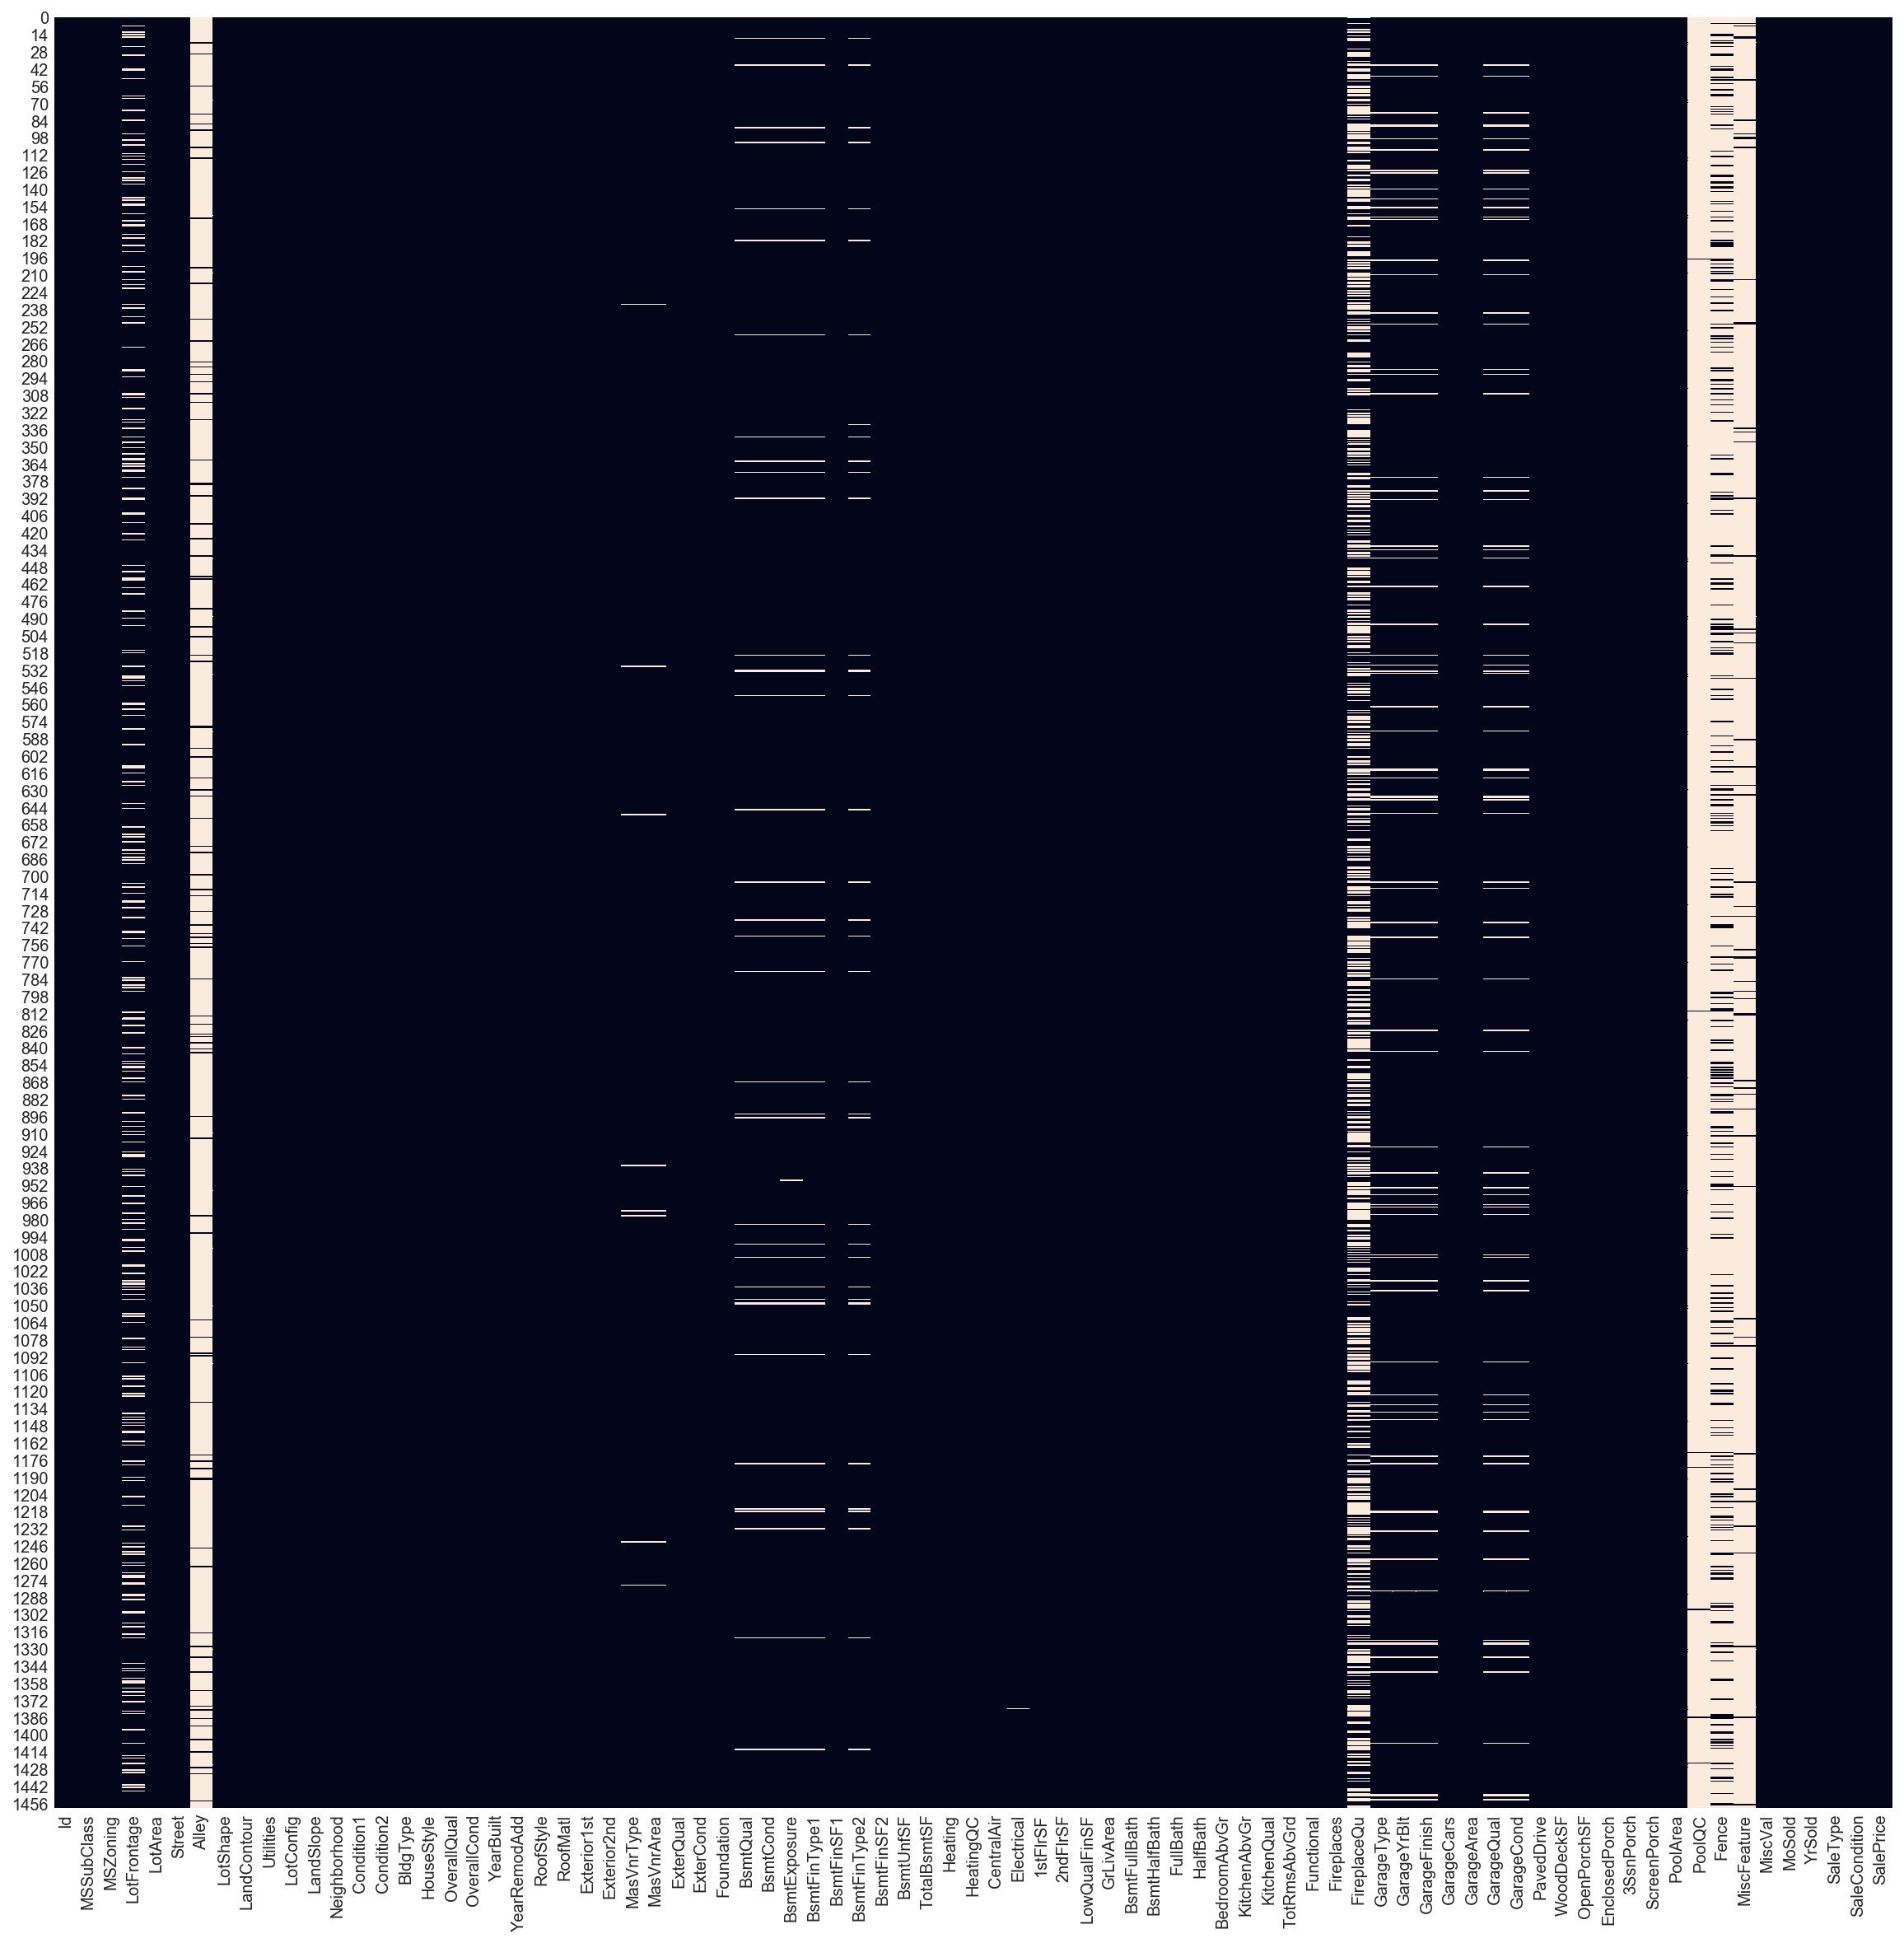

In [6]:
plt.figure(figsize=(20,20))
sns.heatmap(house.isnull(), cbar = None)
plt.plot()

In [7]:
# There are columns with massive amounts missing data 
# Alley , FireplaceQu, PoolQC , 'Fence', 'MiscFeature'

#### Columns with many same values

Some examples of things that ARE renovate-able and dropped for purpose of our predictor:

    Roof and exterior features
    "Quality" metrics, such as kitchen quality
    "Condition" metrics, such as condition of garage
    Heating and electrical components
    and generally anything you deem can be modified without having to undergo major construction on the house.

#### Create new Dataframe with fixed features only

In [8]:
house_clean  = house.drop(columns=list(house.columns[house.columns.str.contains('Misc|Qual|Cond|Heat|Elect|Roof|Utilities')]))
house_clean  = pd.concat([house_clean , house['BsmtQual']], axis =1) #bsmt Qual is about height

In [9]:
# This threw MANY Errors : house_clean = house.loc[:, ~house.columns.str.contains('Misc|Qual|Cond|Heat|Elect|Roof|Utilities')]
# This excluded overall house quality and cond as well.. Is it a good idea?
# We can exclude, as the quality and condition of the house is a function of the other quality and cond metrics. 

# Exploratory Data Analysis

#### Is there a best time? High Demand might drive prices up artificially.

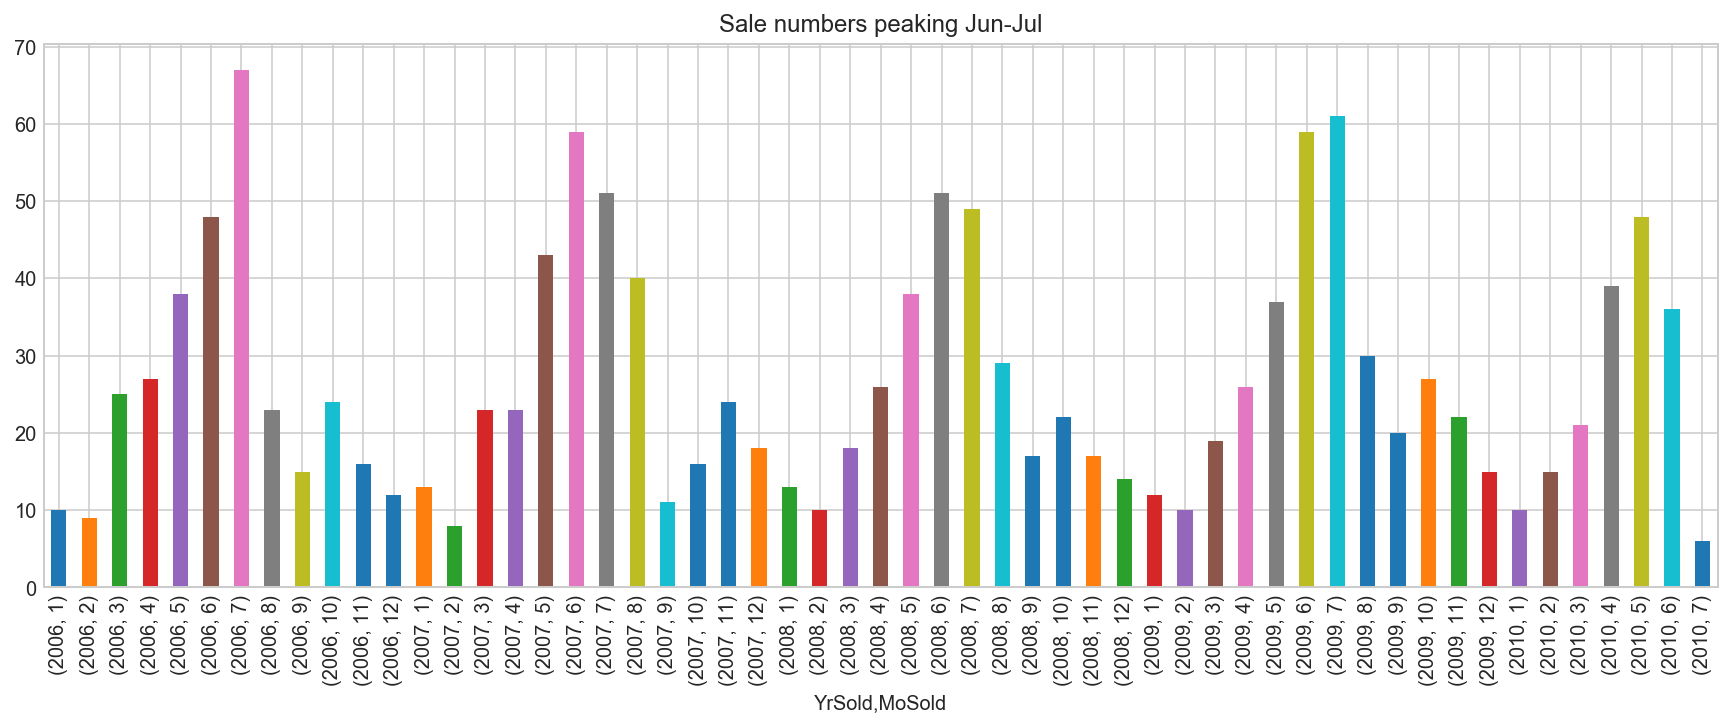

In [11]:
# When where houses sold?
house.groupby(['YrSold','MoSold']).size().plot(kind='bar', figsize=(15,5))
plt.title('Sale numbers peaking Jun-Jul')
plt.show()

In [12]:
# REMEMBER : We are training the model on data pre-2010 on 2010 data. 

#### Location

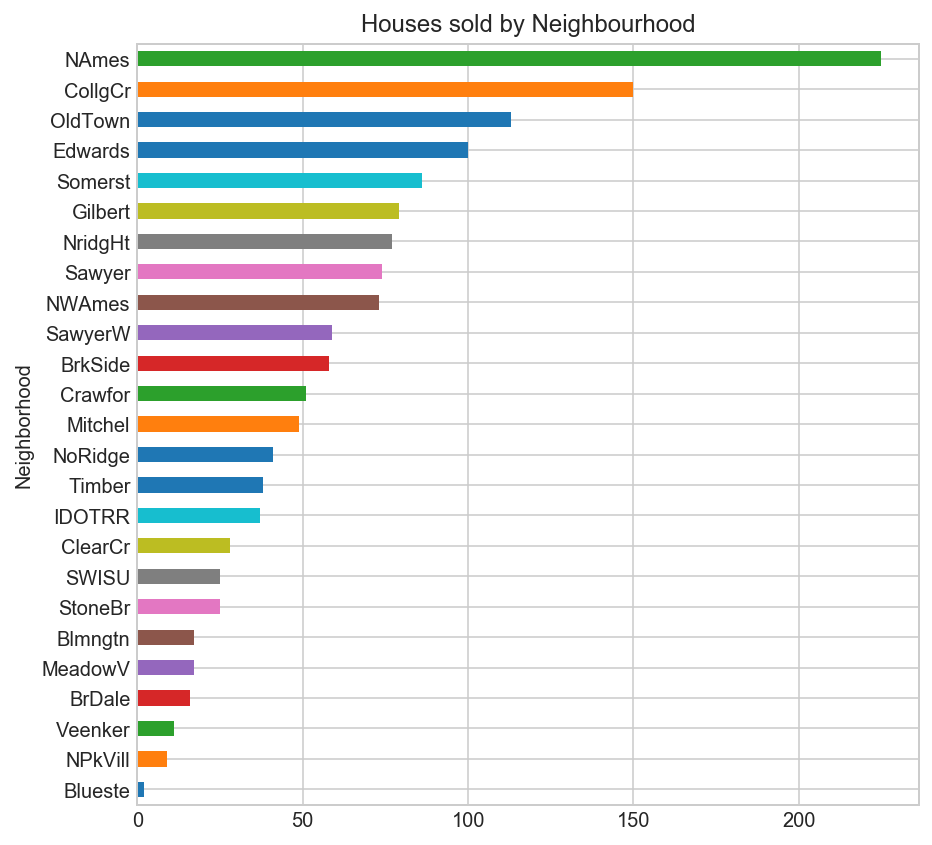

In [13]:
house.groupby('Neighborhood').size().sort_values(ascending = True).plot(kind = 'barh', figsize = (7,7))
plt.title('Houses sold by Neighbourhood')
plt.show()

# most of the houses sold are in NAmes

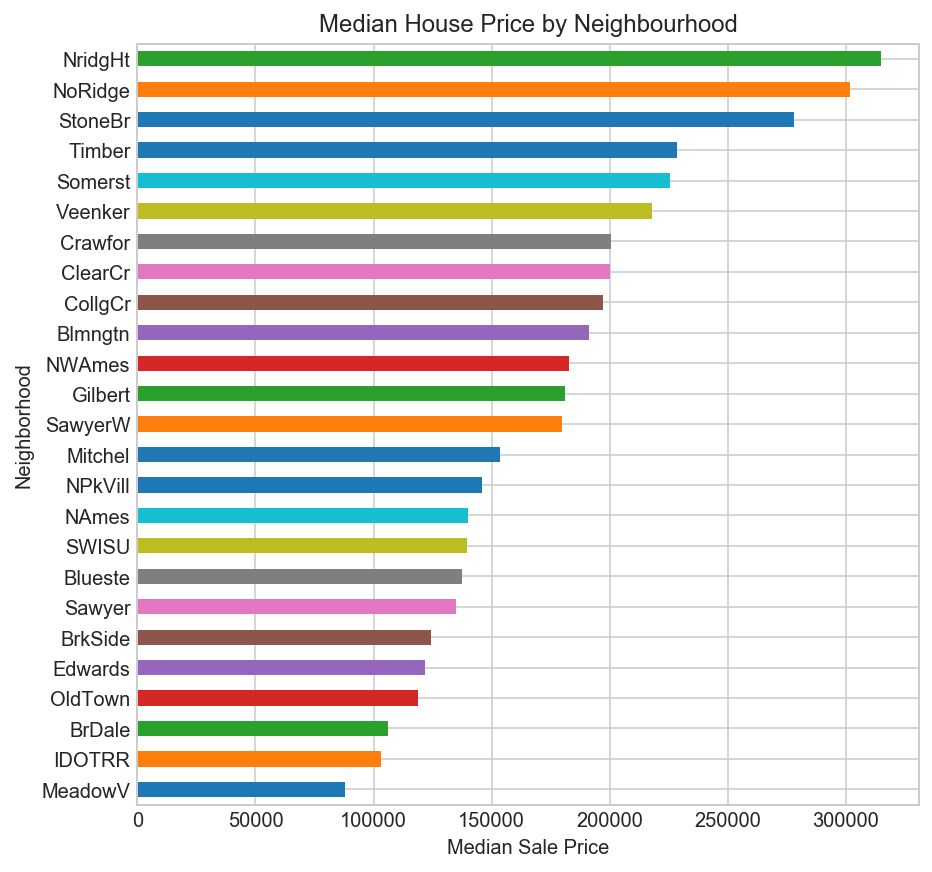

In [14]:
house.groupby('Neighborhood')['SalePrice'].median().sort_values(ascending = True).plot(kind='barh', figsize = (7,7))
plt.title('Median House Price by Neighbourhood')
plt.xlabel('Median Sale Price')
plt.show()

# most expensive houses in NridgHt

#### Age of the houses

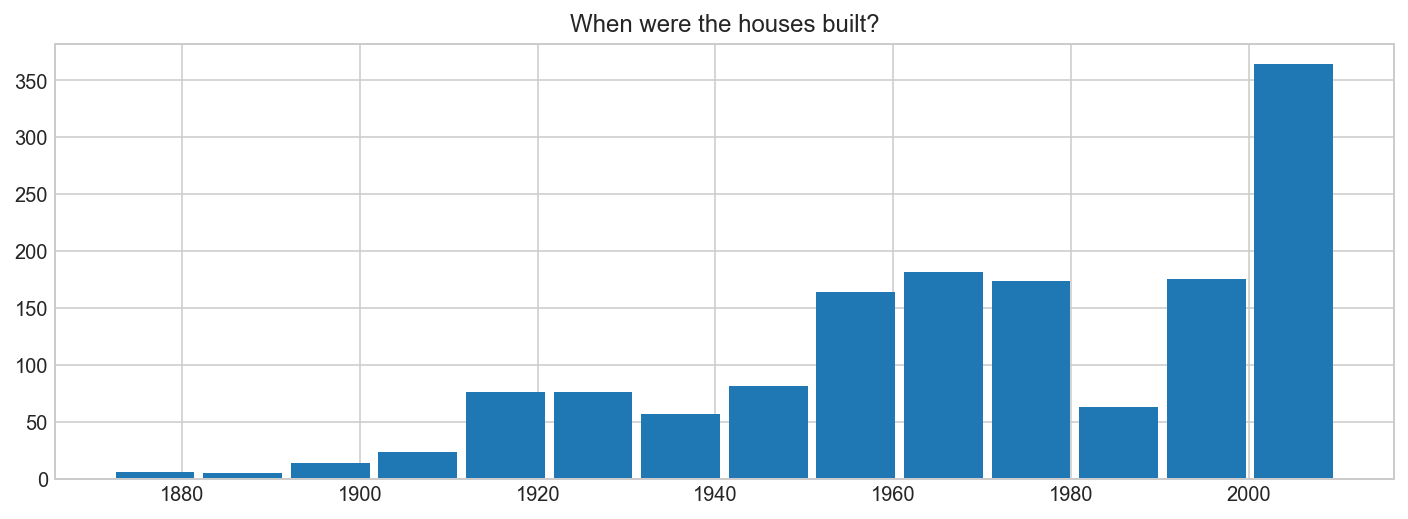

Oldest house built in 1872. Newest house built in 2010.


In [15]:
house.YearBuilt.hist(bins=14, rwidth=.9, figsize=(12,4))
plt.title('When were the houses built?')
plt.show()
print('Oldest house built in {}. Newest house built in {}.'.format(house.YearBuilt.min(), house.YearBuilt.max()))


#### Size of the houses

The average house has 1,515 sq ft of space, the median 1,464 sq ft
The biggest house has 5,642 sq ft of space, the smallest 334 sq ft


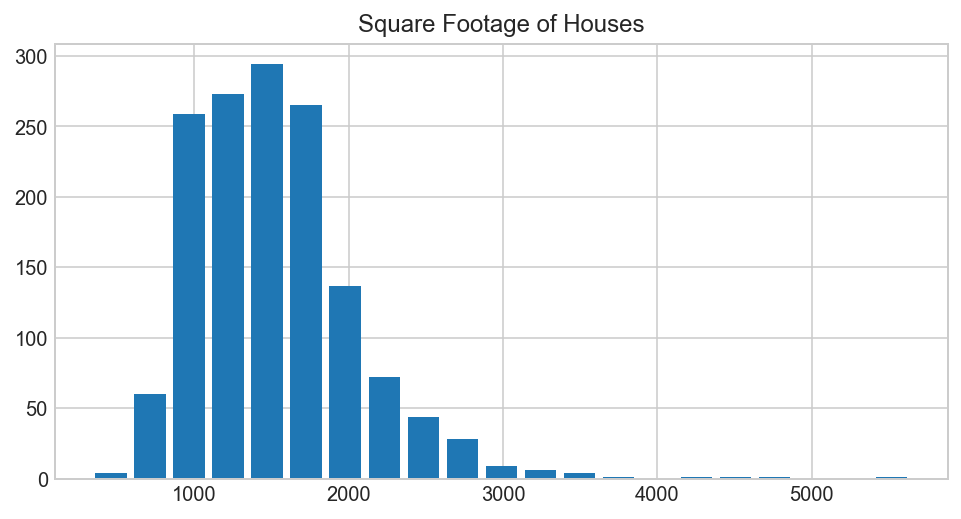

In [16]:
# How big are houses
print('The average house has {:,.0f} sq ft of space, the median {:,.0f} sq ft'.format(
    house.GrLivArea.mean(), house.GrLivArea.median()))
print('The biggest house has {:,.0f} sq ft of space, the smallest {:,.0f} sq ft'.format(
    house.GrLivArea.max(), house.GrLivArea.min()))
house.GrLivArea.hist(bins=21, rwidth=.8, figsize=(8,4))
plt.title('Square Footage of Houses')
plt.show()

#### Distribution of sales price (Outliers?)

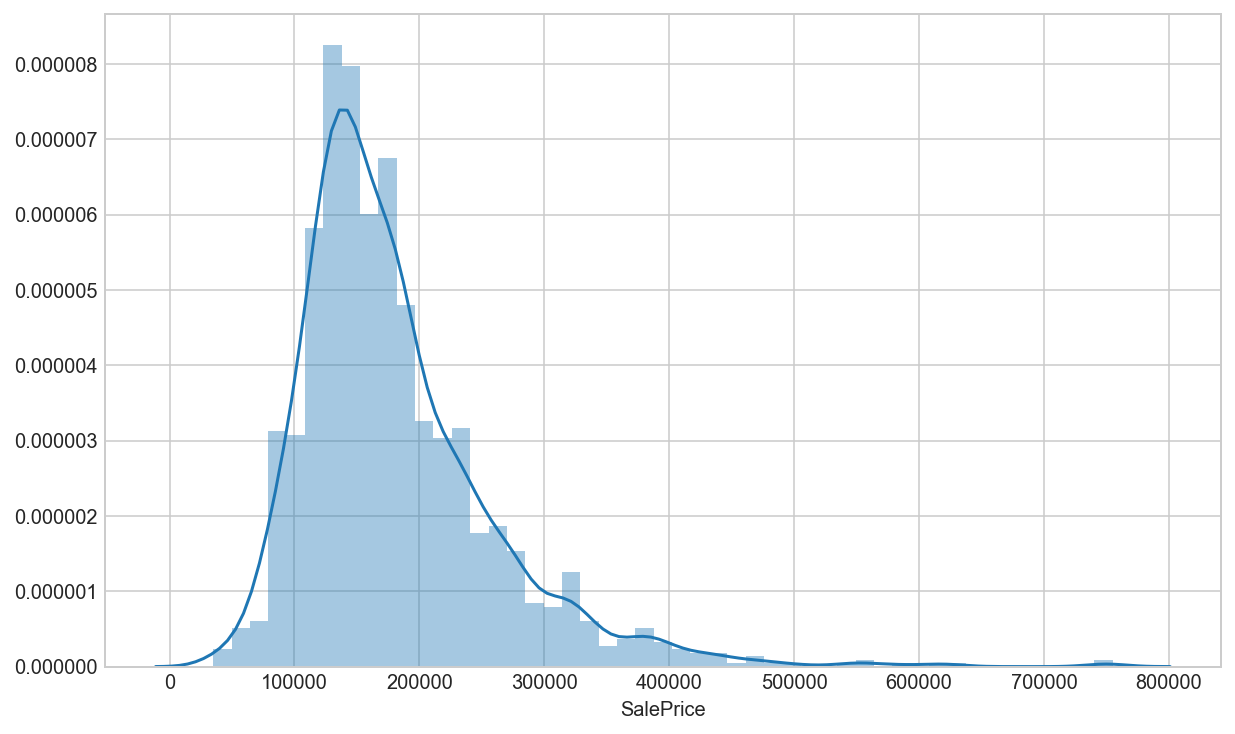

In [17]:
plt.figure(figsize=(10,6))
sns.distplot(house_clean.SalePrice)
plt.show()

#### Split numerical and categorical features

In [18]:
house_clean.dtypes

Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
Street            object
Alley             object
LotShape          object
LandContour       object
LotConfig         object
LandSlope         object
Neighborhood      object
BldgType          object
HouseStyle        object
YearBuilt          int64
YearRemodAdd       int64
Exterior1st       object
Exterior2nd       object
MasVnrType        object
MasVnrArea       float64
Foundation        object
BsmtExposure      object
BsmtFinType1      object
BsmtFinSF1         int64
BsmtFinType2      object
BsmtFinSF2         int64
BsmtUnfSF          int64
TotalBsmtSF        int64
CentralAir        object
1stFlrSF           int64
                  ...   
GrLivArea          int64
BsmtFullBath       int64
BsmtHalfBath       int64
FullBath           int64
HalfBath           int64
BedroomAbvGr       int64
KitchenAbvGr       int64
TotRmsAbvGrd       int64
Functional        object


In [19]:
# look to convert certain features that should be categorical , but are int/float

house_clean['MSSubClass'] = house_clean.MSSubClass.apply(lambda x: str(x))
house_clean['MoSold'] = house_clean.MoSold.apply(lambda x: str(x))
house_clean['YrSold'] = house_clean.YrSold.apply(lambda x: str(x))

In [20]:
def get_feature_groups():
    """ Returns a list of numerical and categorical features,
    excluding SalePrice and Id. """
    # Numerical Features
    num_f= house_clean.select_dtypes(include=['int64','float64']).columns
    num_f = num_f.drop(['Id','SalePrice']) # drop ID and SalePrice

    # Categorical Features
    cat_f = house_clean.select_dtypes(include=['object']).columns
    return list(num_f), list(cat_f)

num_f, cat_f = get_feature_groups()

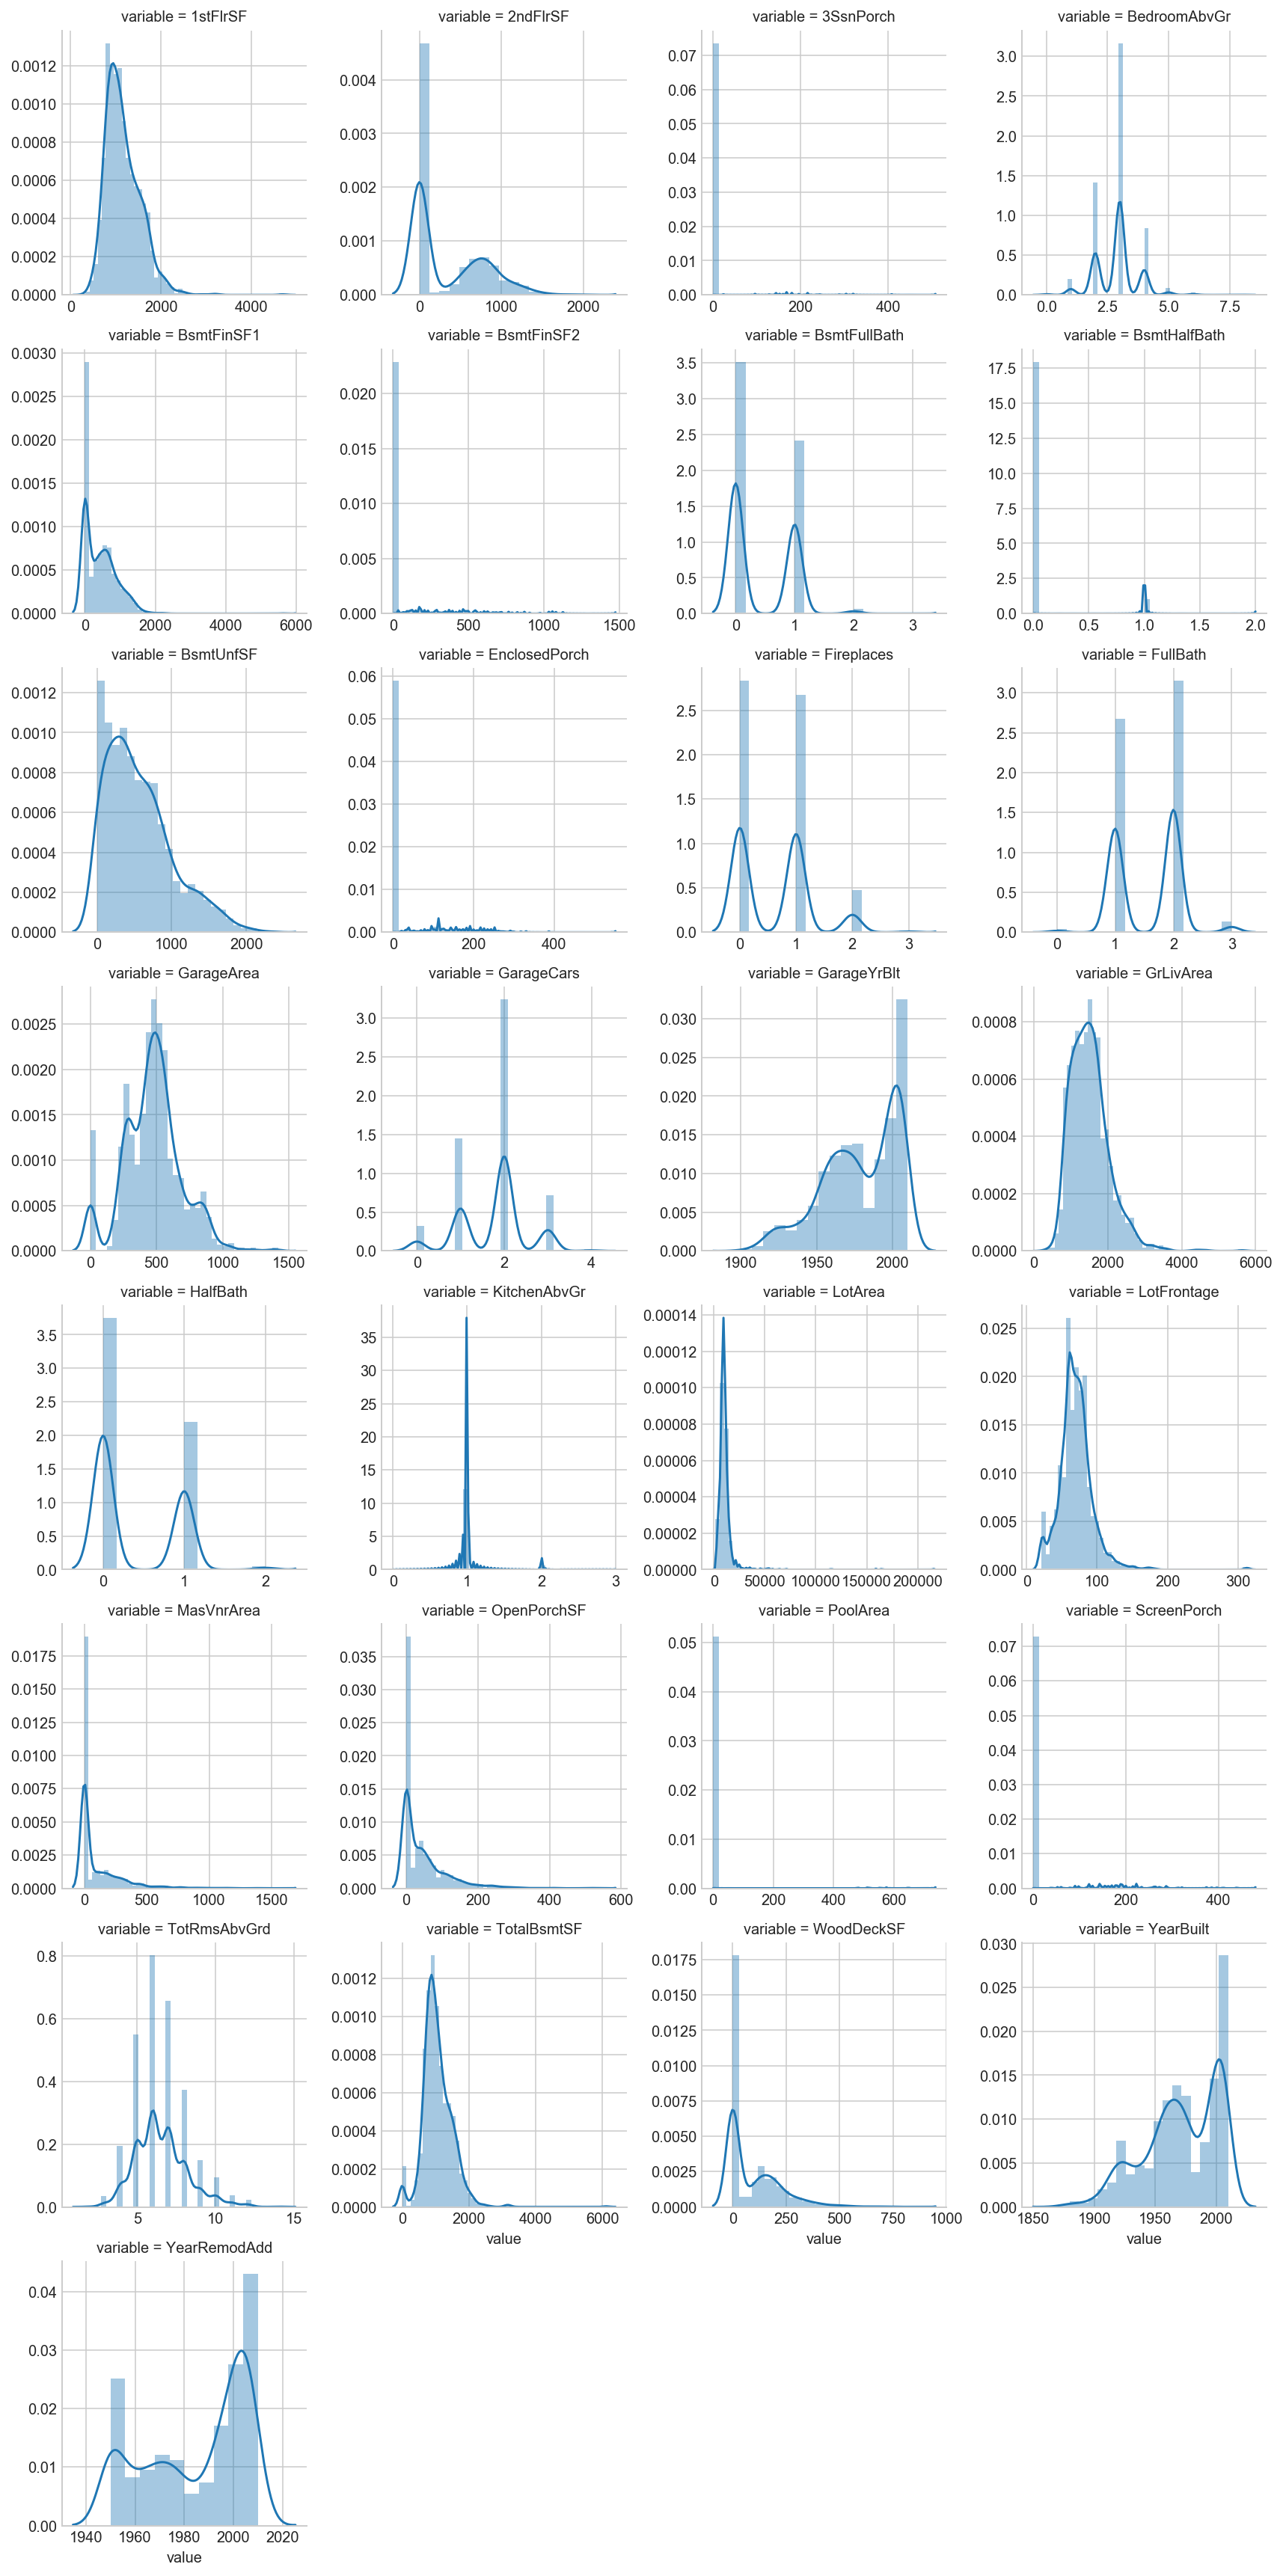

In [21]:
# Grid of distribution plots of all numerical features
f = pd.melt(house_clean, value_vars=sorted(num_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
g = g.map(sns.distplot, 'value')
plt.show()

#### There are few variables that have the same shape as sales price : Namely 1stFlrSF, BsmtUnfSF, GrLivAre, GarageArea,LotArea, LotFrontage, TotalBsmtSF

/anaconda3/lib/python3.6/site-packages/seaborn/axisgrid.py:703: UserWarning: Using the countplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


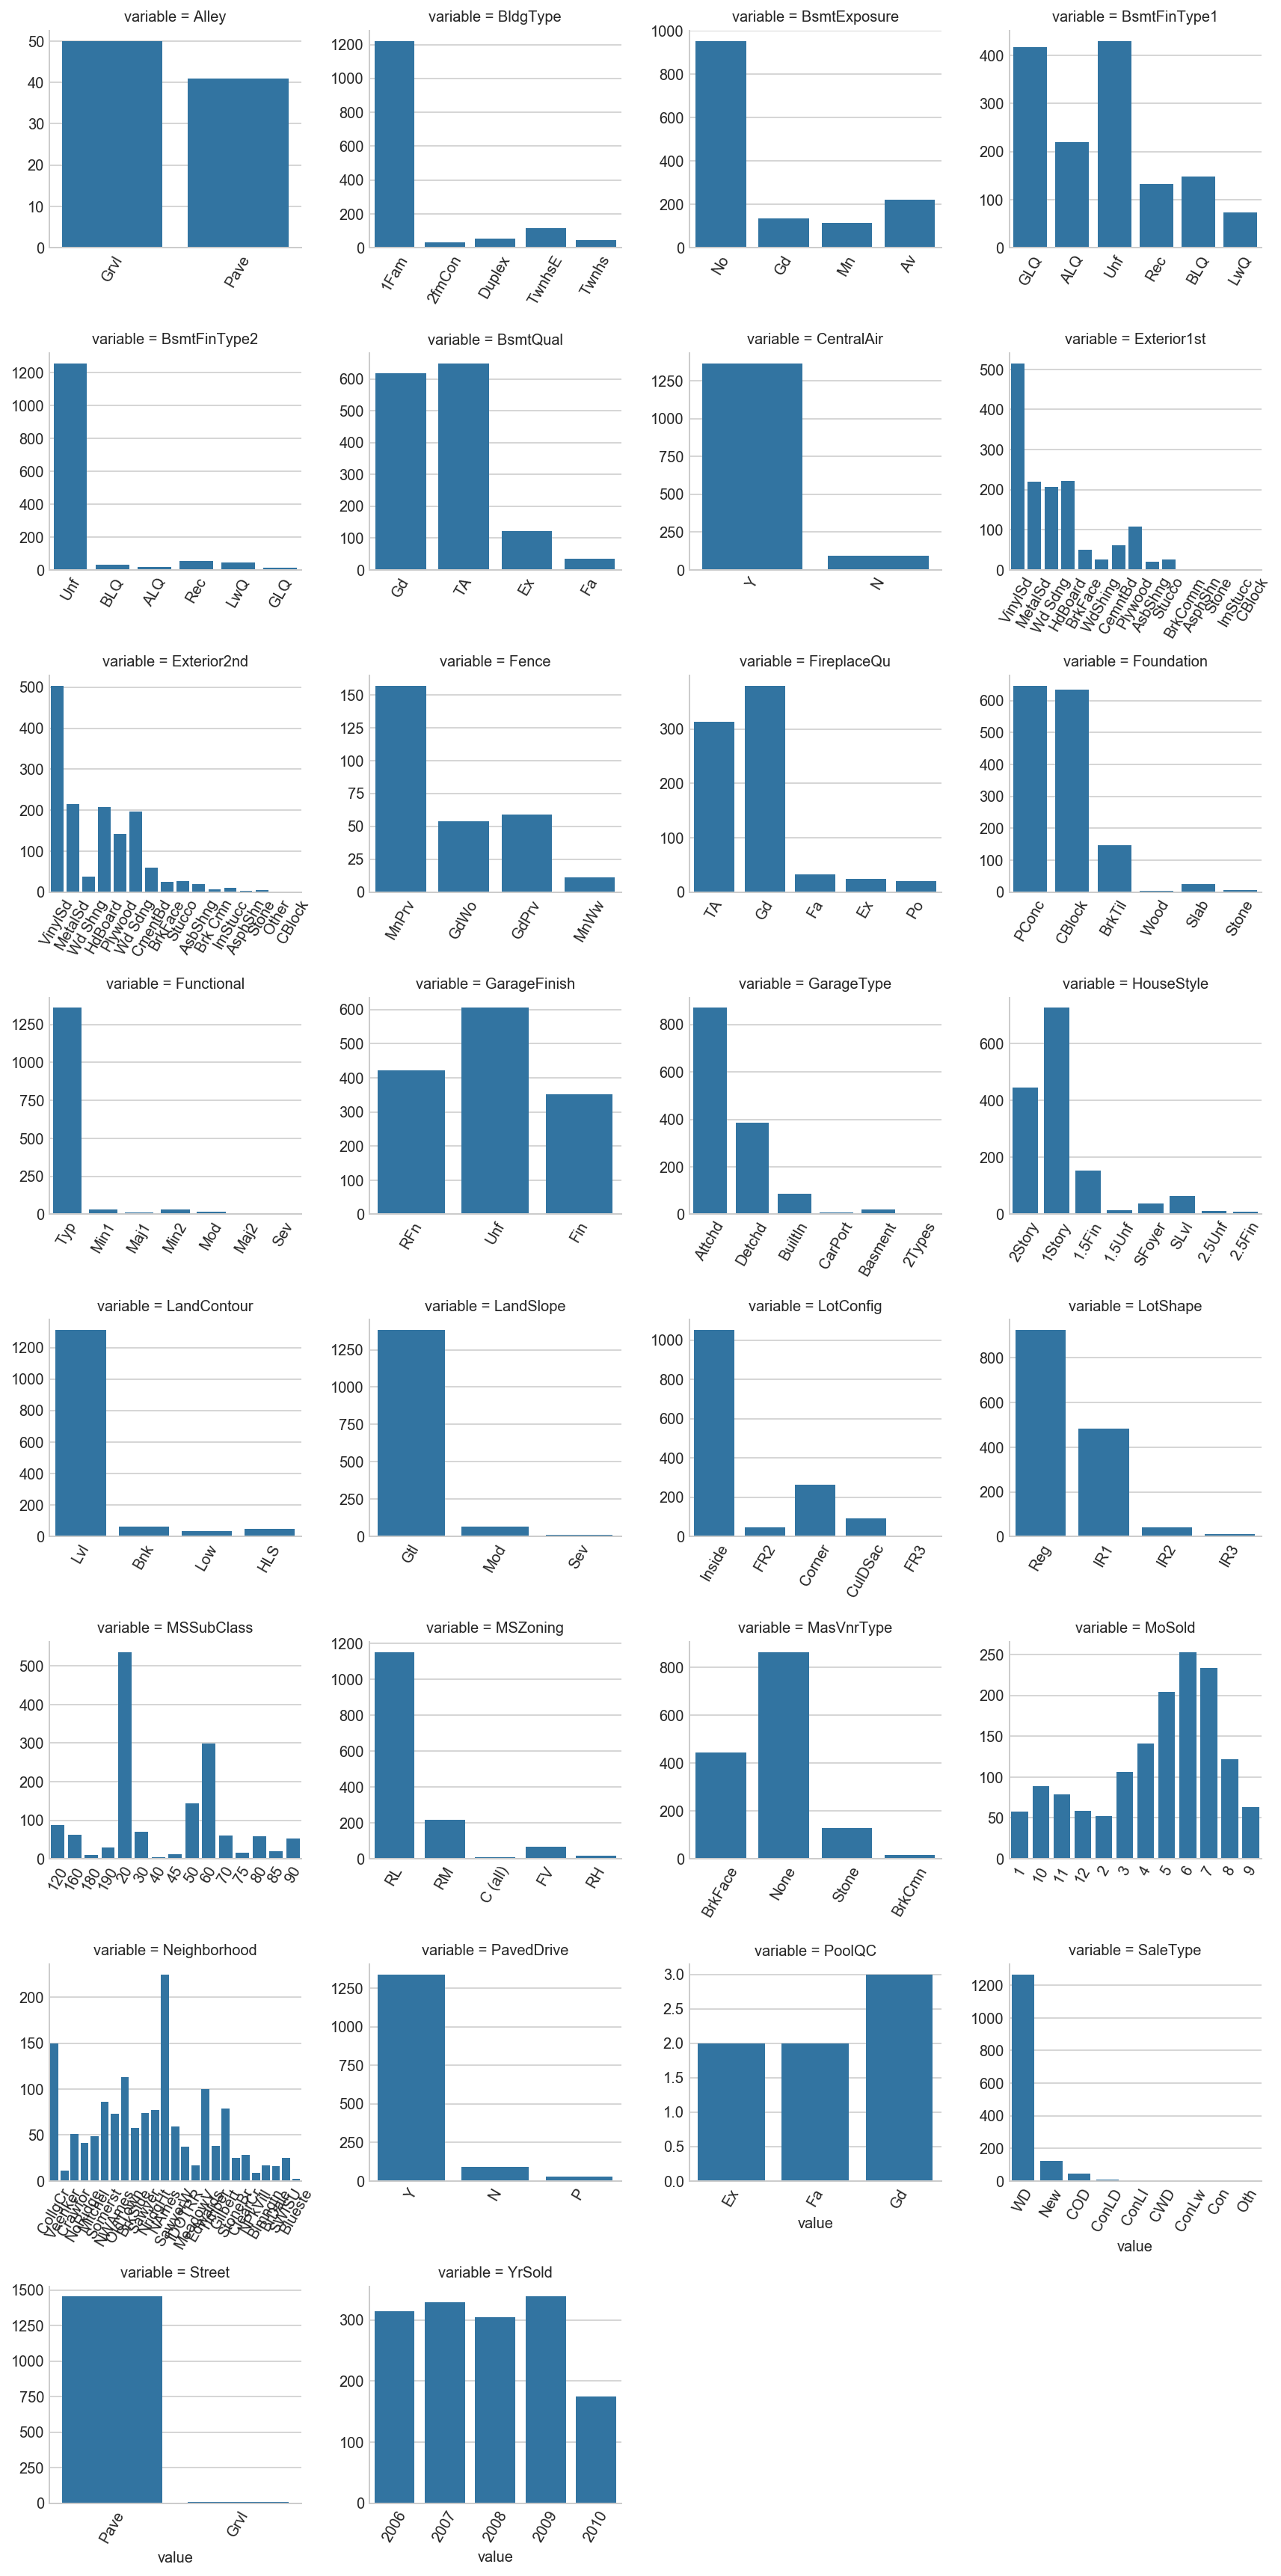

In [22]:
# Count plots of categorical features
f = pd.melt(house_clean, value_vars=sorted(cat_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.countplot, 'value')
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Compare against SalesPrice

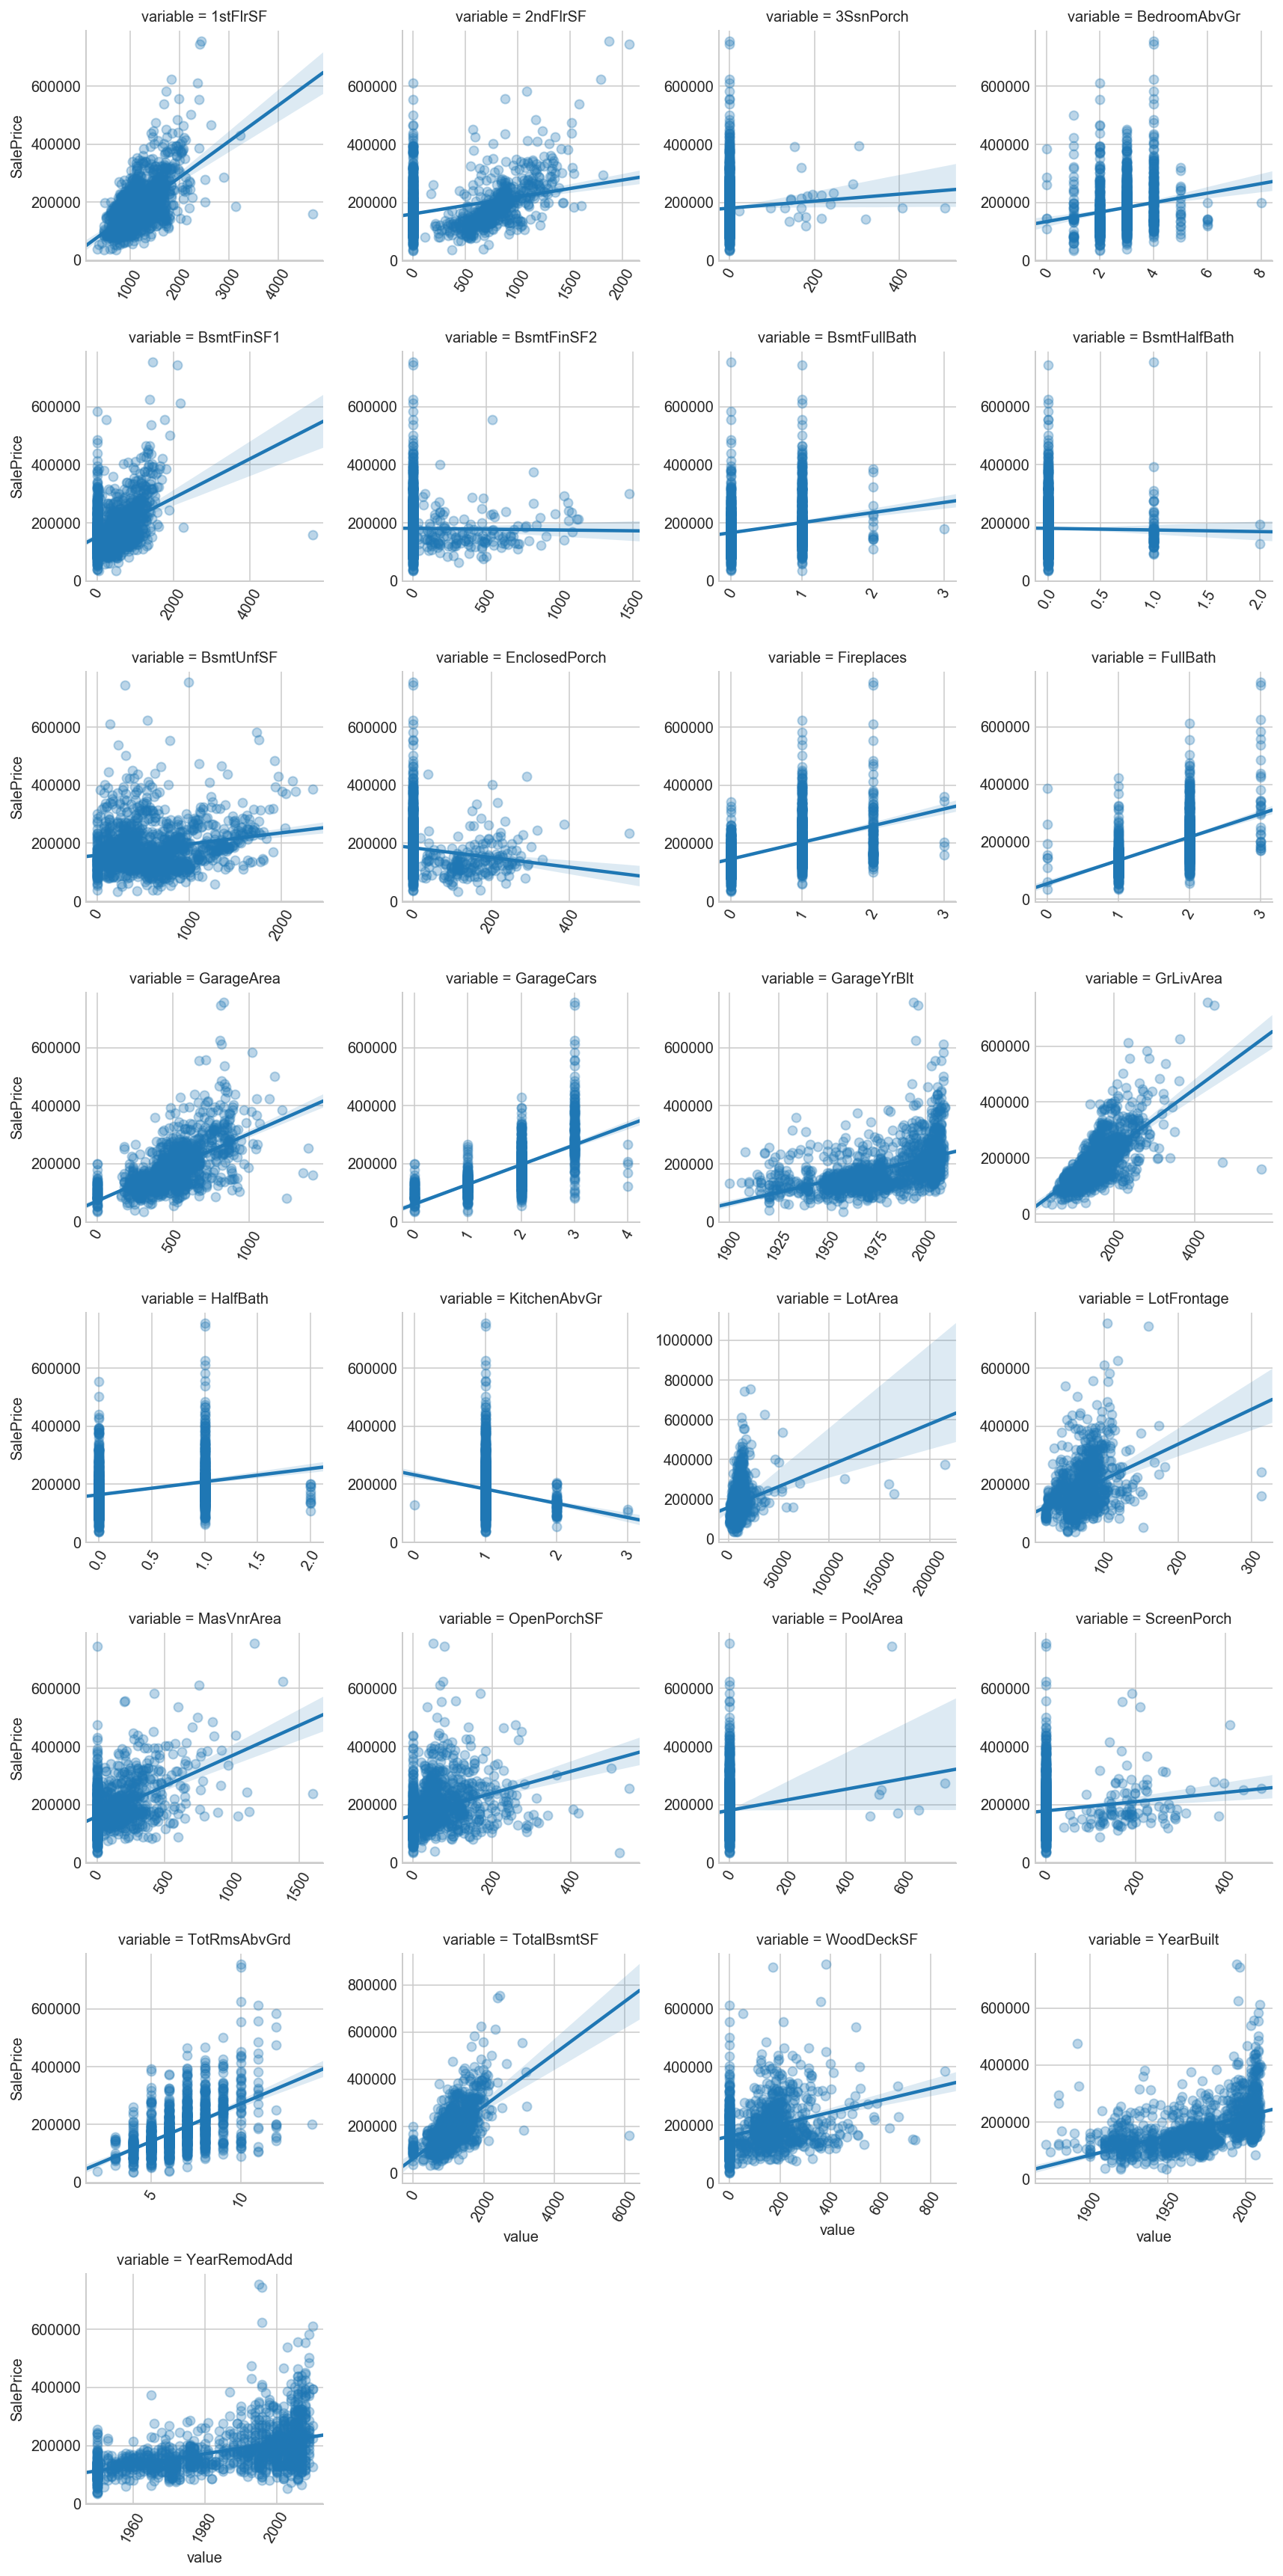

In [23]:
# Scatter plots of numerical features against SalePrice
f = pd.melt(house_clean, id_vars=['SalePrice'], value_vars=sorted(num_f))
g = sns.FacetGrid(f, col='variable', col_wrap=4, sharex=False, sharey=False)
plt.xticks(rotation='vertical')
g = g.map(sns.regplot, 'value', 'SalePrice', scatter_kws={'alpha':0.3})
[plt.setp(ax.get_xticklabels(), rotation=60) for ax in g.axes.flat]
g.fig.tight_layout()
plt.show()

#### Few features that seem to show strong correlation to SalePrice, such as TotalBsmtSF, GrLivArea, and TotRmsAbvGrd. This confirms our natural intuition: we would expect that high quality, big house with big basements and lots of rooms to be more expensive.

## Heatmap for numerical features

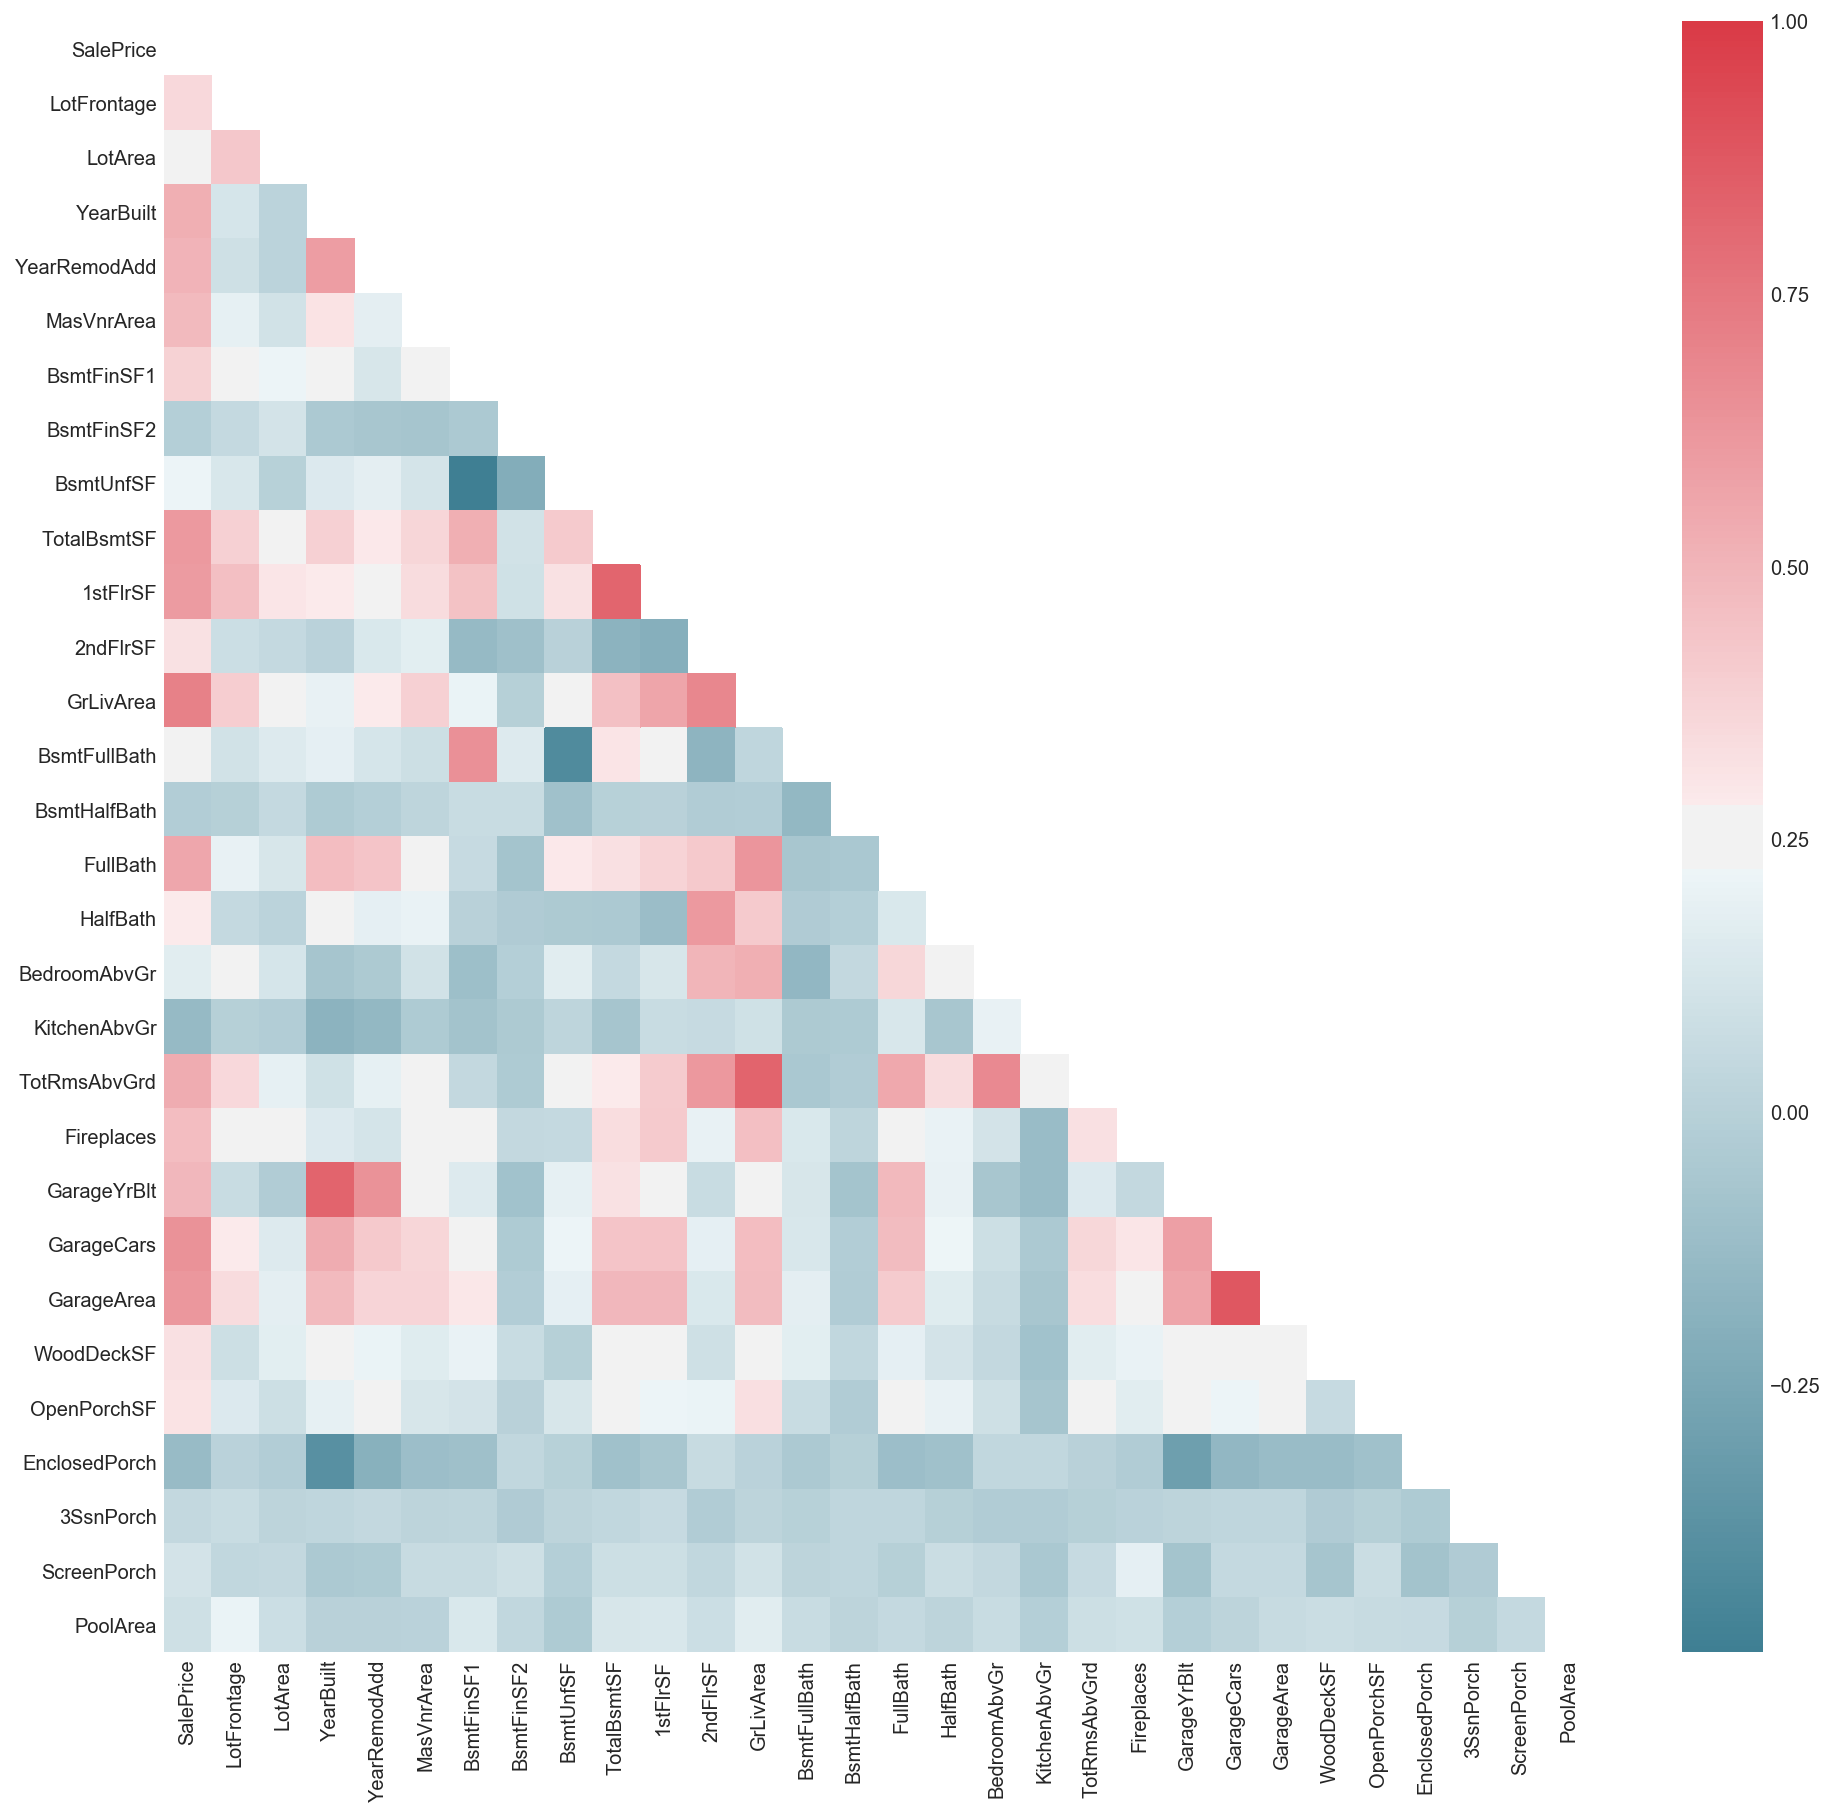

In [24]:
# Let's take a look at the correlation between numerical features
corr = house_clean[['SalePrice'] + num_f].corr()
fig = plt.figure(figsize=(16,15))
ax = fig.add_subplot(111)
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


sns.heatmap(corr, 
           xticklabels=corr.columns.values,
           yticklabels=corr.index.values,
           cmap=cmap,mask=mask)

plt.show()

Regarding correlation between features, we find that GarageYrBlt is highly correlated with YearBuilt, which means that most garages were built along with the house. TotalBsmtSF correlates highly with 1stFlrSF, GarageCars with GarageArea , TotRmsAbvGrd which makes sense.

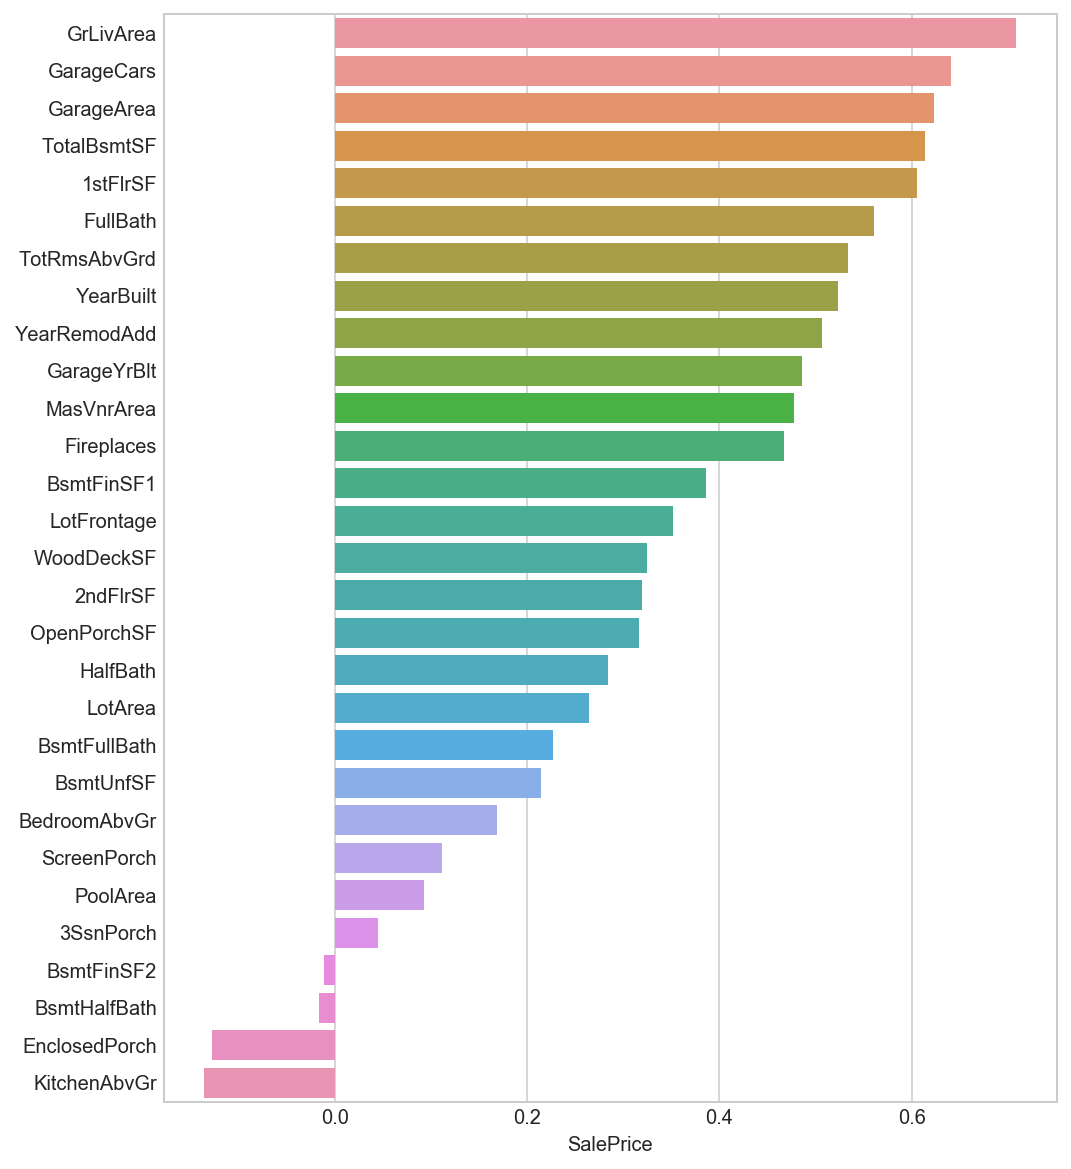

In [25]:
# Feature sorted by correlation to SalePrice, from positive to negative
corr = corr.sort_values('SalePrice', ascending=False)
plt.figure(figsize=(8,10))
sns.barplot(corr.SalePrice[1:], corr.index[1:], orient='h')
plt.show()

### Categorical Null/Zero values

### Sparse values

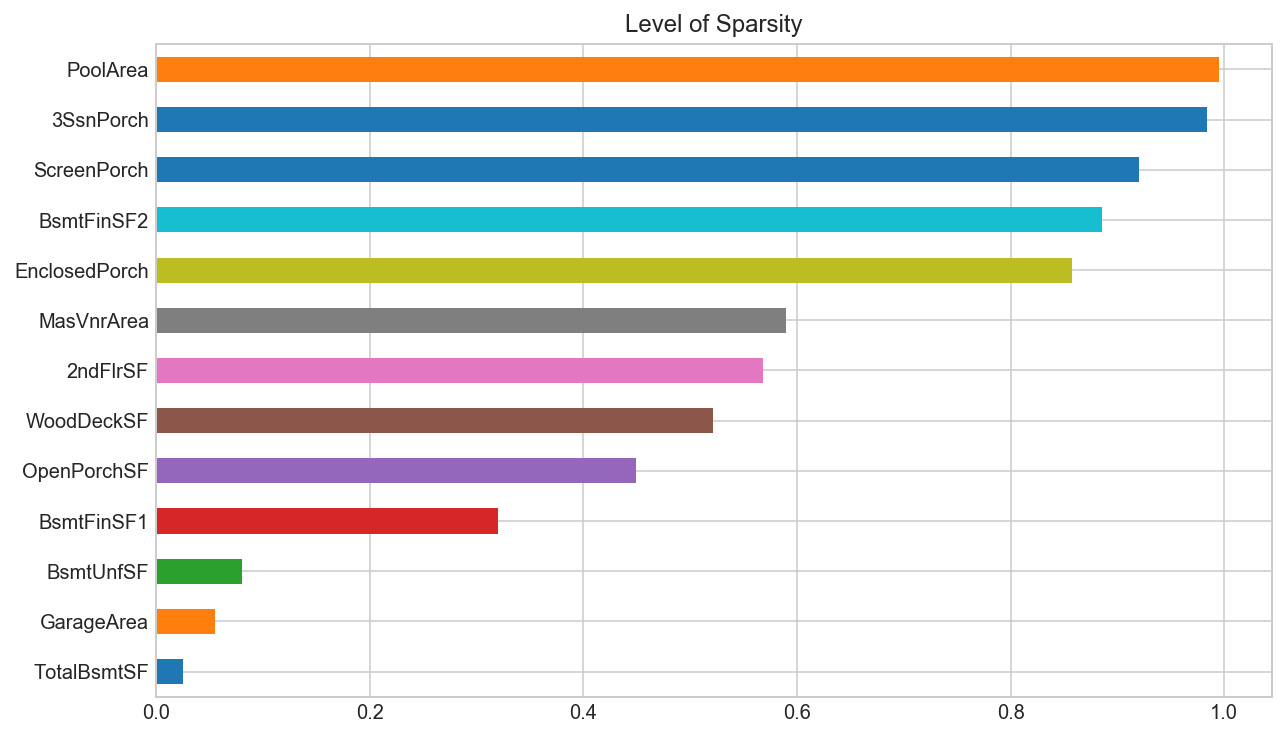

In [26]:
# Percentage of zero values
count_features = ['BsmtFullBath','BsmtHalfBath','FullBath','HalfBath','BedroomAbvGr',
                  'KitchenAbvGr','TotalRmsAbvGr','Fireplaces','GarageCars']

non_count_features = [f for f in num_f if f not in count_features]

sparse_features = (house_clean[non_count_features] == 0).sum() / house_clean.shape[0]

sparse_features[sparse_features > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))

plt.title('Level of Sparsity')
plt.show()

### Categorical columns impute null values with 'Missing'

In [27]:
house_clean[cat_f] = house_clean[cat_f].fillna('Missing')
missing_values = (house_clean[cat_f] == 'Missing').sum().sort_values(ascending=False)
missing_values[missing_values > 0]

PoolQC          1453
Alley           1369
Fence           1179
FireplaceQu      690
GarageFinish      81
GarageType        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtQual          37
MasVnrType         8
dtype: int64

### MasVnrType has both none and missing. Check!

In [28]:
house_clean.MasVnrType.value_counts()

None       864
BrkFace    445
Stone      128
BrkCmn      15
Missing      8
Name: MasVnrType, dtype: int64

In [29]:
house_clean.MasVnrType.replace({'Missing':'None'}, inplace=True)

In [30]:
# MasVnrArea is a weird column with discrepancies.
# houses with MasVnrType == None but MasVnrArea > 0 and
# house with MasVnrArea == 0 but MasVnrType != None
# Assume that there is a Mason Veneer. 

house_clean.loc[(house_clean.MasVnrType == 'None') & (house_clean.MasVnrArea > 1), 'MasVnrType'] = 'BrkFace' # most common 
house_clean.loc[(house_clean.MasVnrType == 'None') & (house_clean.MasVnrArea == 1), 'MasVnrArea'] = 0 # 1 sq ft is basically 0
for vnr_type in house_clean.MasVnrType.unique():
    # so here we set the area equal to the mean of the given veneer type
    house_clean.loc[(house_clean.MasVnrType == vnr_type) & (house_clean.MasVnrArea == 0), 'MasVnrArea'] = \
        house_clean[house_clean.MasVnrType == vnr_type].MasVnrArea.mean() 

### Remaining numerical data that has Nan

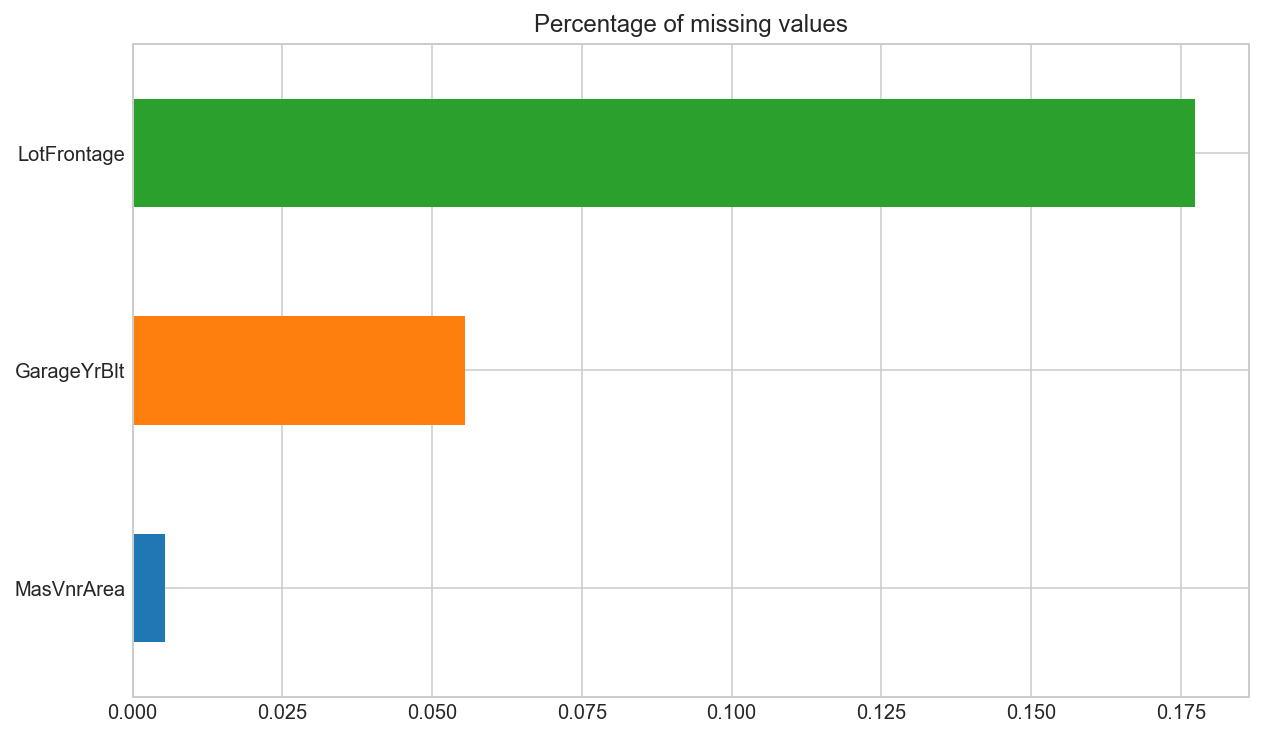

In [31]:
# Remaining missing values
missing_data =  house_clean.isnull().sum() /  house_clean.shape[0]
missing_data[missing_data > 0].\
    sort_values(ascending=True).\
    plot(kind='barh', figsize=(10,6))
plt.title('Percentage of missing values')
plt.show()

In [32]:
# LotFrontage is "Linear feet of street connected to property"
# Since it seems unlikely that there's no street connected
# to a lot, we'll set it equal to the median LotFrontage of that street.
house_clean.LotFrontage = house_clean.groupby('Neighborhood')['LotFrontage'].transform(lambda x: x.fillna(x.median()))

In [33]:
# MasVnrArea is "Masonry veneer area in square feet"
# This feature consists of a majority of 0 values, so 
# it's odd to find missing values here. Let's set to 0
house_clean.MasVnrArea.fillna(0, inplace=True)

In [34]:
# Since GarageYrBlt missing means there's no garage
# we'll set it equal to 0
house_clean.GarageYrBlt.fillna(0, inplace=True)

In [35]:
# Anything left?
house_clean.isnull().sum().sum()

0

### Additional features for the data set

In [36]:
# Total Square Footage
house_clean['TotalSF'] = house_clean.TotalBsmtSF + house_clean.GrLivArea
house_clean['TotalFloorSF'] = house_clean['1stFlrSF'] + house_clean['2ndFlrSF'] # this is 
house_clean['TotalPorchSF'] = house_clean.OpenPorchSF + house_clean.EnclosedPorch + \
    house_clean['3SsnPorch'] + house_clean.ScreenPorch

In [37]:
# Total Bathrooms
house_clean['TotalBathrooms'] = house_clean.FullBath + .5 * house_clean.HalfBath + \
    house_clean.BsmtFullBath + .5 * house_clean.BsmtHalfBath

In [38]:
# Booleans
house_clean['HasBasement'] = house_clean.TotalBsmtSF.apply(lambda x: 1 if x > 0 else 0)
house_clean['HasGarage'] = house_clean.GarageArea.apply(lambda x: 1 if x > 0 else 0)
house_clean['HasPorch'] = house_clean.TotalPorchSF.apply(lambda x: 1 if x > 0 else 0)
house_clean['HasPool'] = house_clean.PoolArea.apply(lambda x: 1 if x > 0 else 0)
house_clean['WasRemodeled'] = (house_clean.YearRemodAdd != house_clean.YearBuilt).astype(np.int64)
house_clean['IsNew'] = (house_clean.YearBuilt > 2000).astype(np.int64)

boolean_features = ['HasBasement', 'HasGarage', 'HasPorch', 'HasPool', 
                    'WasRemodeled', 'IsNew']

In [39]:
num_f, cat_f = get_feature_groups()
num_f = [f for f in num_f if f not in boolean_features]

### Log transform for the features to smoothen out the $R^2$

In [40]:
features = num_f+ ['SalePrice']
for f in features:
    house_clean.loc[:,f] = np.log1p(house_clean[f])

# Model

### Define X & Y

In [41]:
y_test = house_clean[house_clean['YrSold'] == '2010']['SalePrice']
y_train = house_clean[house_clean['YrSold'] != '2010']['SalePrice']

In [42]:
X = house_clean.drop('SalePrice', axis=1)
X.drop('Id', axis=1, inplace=True)

In [43]:
X = pd.get_dummies(X, drop_first=True).copy()
X.shape

(1460, 217)

In [44]:
#Remember we are training with pre-2010 data and testing with post 2010 data. 

X_test = X[X['YrSold_2010'] == 1]
X_train =  X[X['YrSold_2010'] == 0]

### Standard Scaler :  Standardize numerical features

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
ss = StandardScaler()
X_train.loc[:,num_f] = ss.fit_transform(X_train[num_f])
X_test.loc[:,num_f] = ss.transform(X_test[num_f])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


## Fixed Features Ridge Regression

In [47]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

In [48]:
# GridSearch here to find the optimal alpha value
param_grid = {'alpha': [0.01, 0.1, 1., 5., 10., 25., 50., 100.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']

# Using optimum : Alpha 
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']
ridge = ridge.best_estimator_


print('Ridge -> R^2: {:.5f} | alpha: {:.5f}'.format(cross_val_score(ridge, X_test, y_test, cv=5, scoring='r2').mean(), alpha))

Ridge -> R^2: 0.83299 | alpha: 12.00000


Ridge dropped 2 of 217 features.


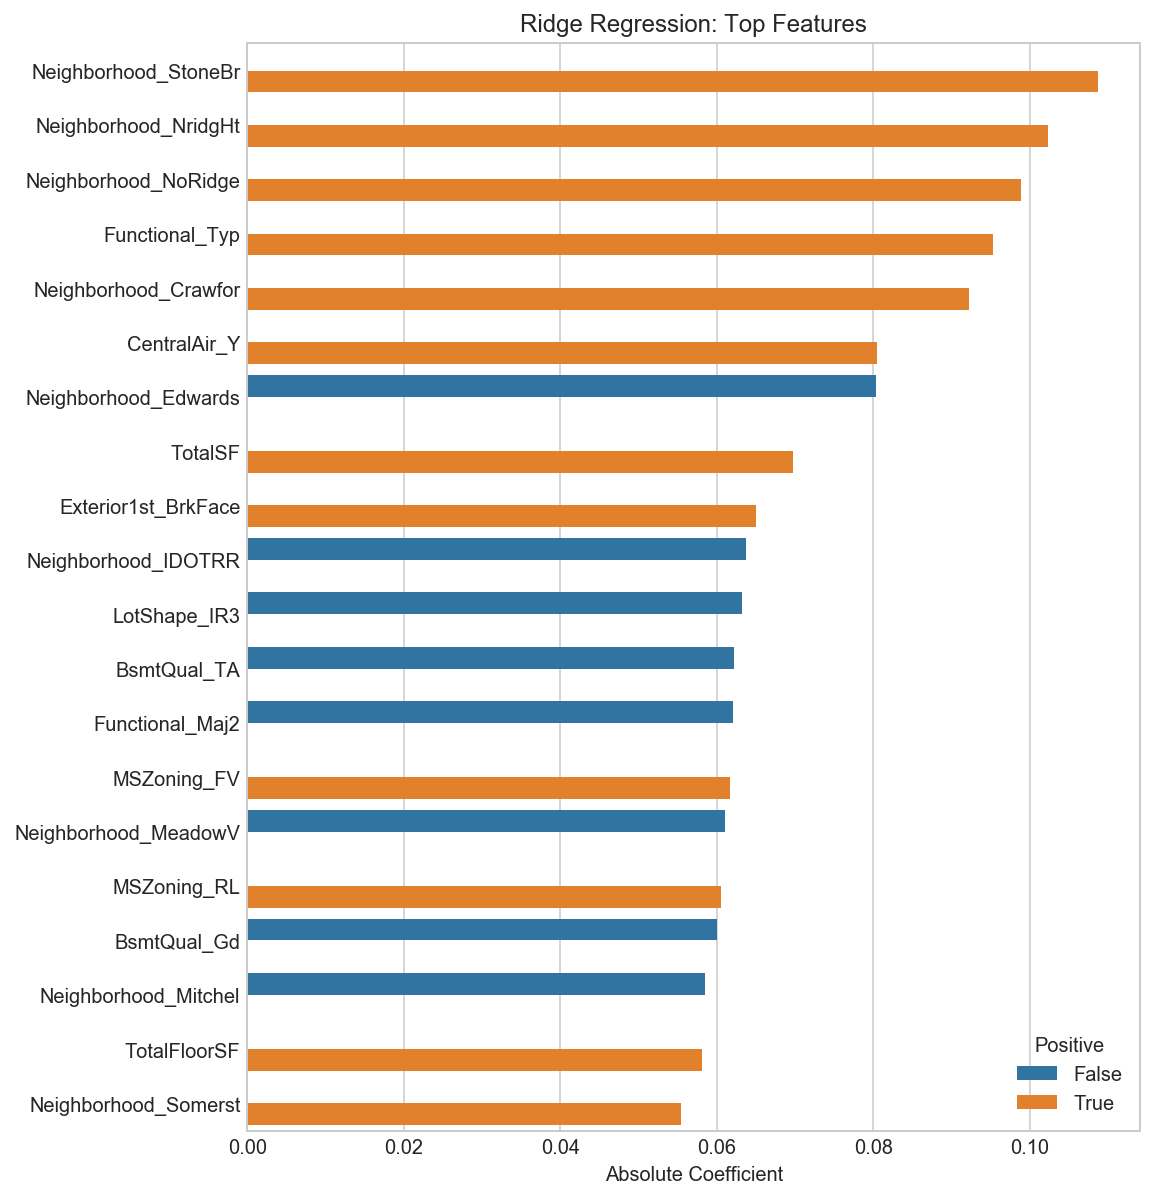

In [49]:
# Let's take a look at what the Ridge regression made of our features.
coefs = pd.DataFrame({'coefs':ridge.coef_,'Positive':ridge.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Ridge dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Ridge Regression: Top Features')
plt.xlabel('Absolute Coefficient')
plt.show()

## Fixed Features Lasso Regression

In [50]:
from sklearn.linear_model import Lasso

In [51]:
# Use GridSearch to find the optimal alpha value

# Get the ballpark
param_grid = {'alpha': [0.0001, 0.001, 0.01, 0.1, 1., 5., 10., 25.], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']

# Hone in
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)], 'max_iter': [50000]}
lasso = GridSearchCV(Lasso(), cv=5, param_grid=param_grid)
lasso.fit(X_train, y_train)
alpha = lasso.best_params_['alpha']
lasso = lasso.best_estimator_


print('Lasso -> R^2: {:.5f}| alpha: {:.5f}'.format(cross_val_score(lasso, X_test, y_test, cv=5, scoring='r2').mean(),alpha))

Lasso -> R^2: 0.79238| alpha: 0.00070


LASSO dropped 125 of 217 features.


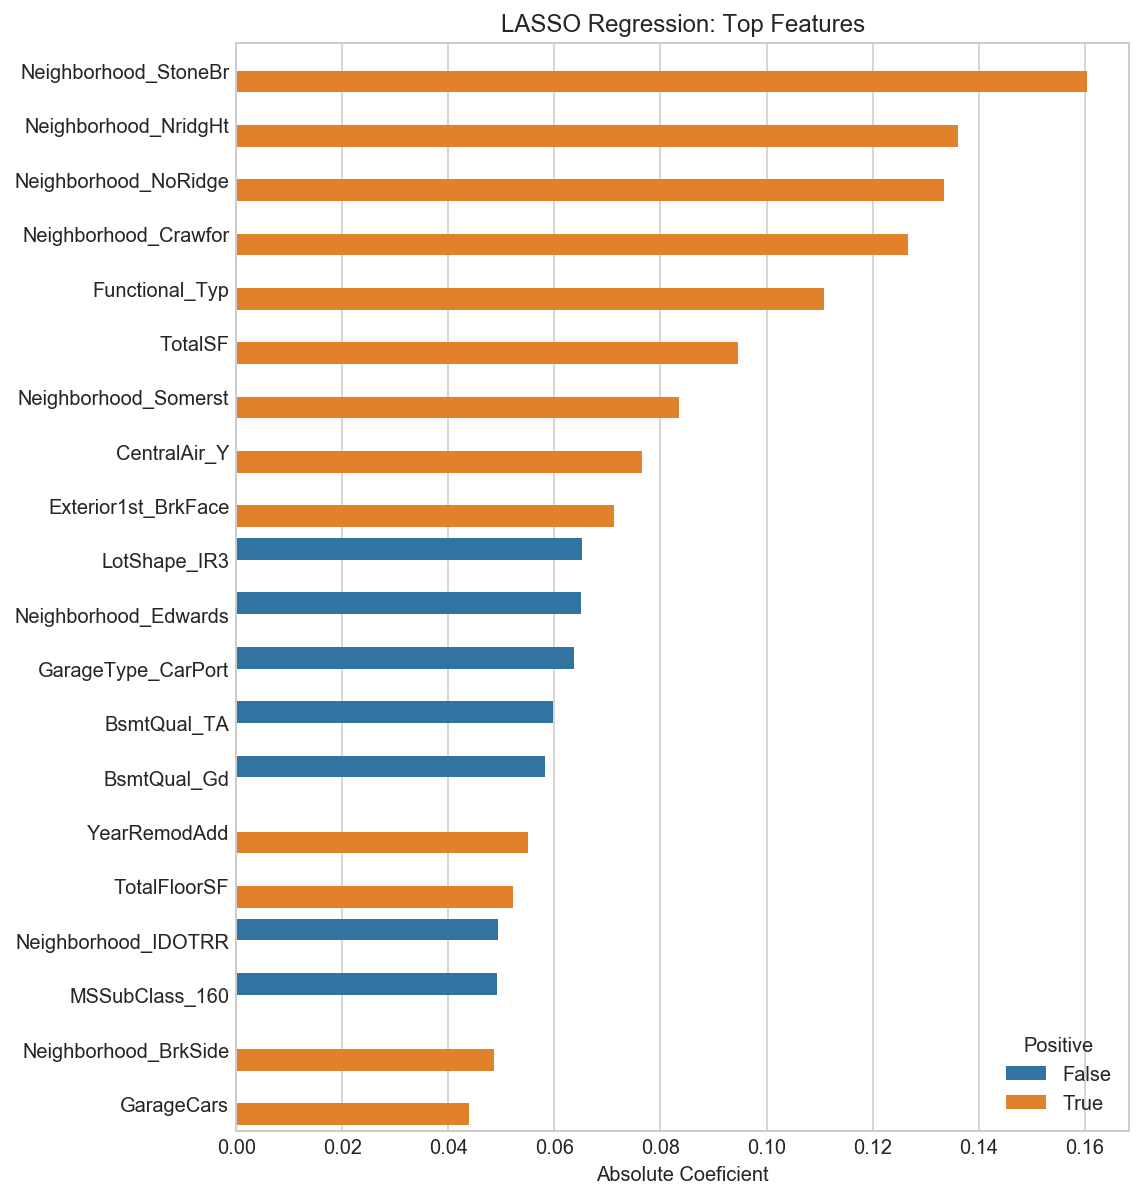

In [52]:
# Let's take a look at what the LASSO regression made of our features.
coefs = pd.DataFrame({'coefs':lasso.coef_,'Positive':lasso.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('LASSO dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('LASSO Regression: Top Features')
plt.xlabel('Absolute Coeficient')
plt.show()

#### Question : Characterize your model. How well does it perform? What are the best estimates of price?

The ridge performed slightly better. 

We can see that neighbourhood is a good estimator for price. 5 of the top 7 absolute coeff are of neighbourhood type.

Total Square feet (TotalSF) and Typical Functional (Functional_Typ) are the other 2 factors in top 7 (which are outside of nieghbouthood). Shows us that price are dependent on Square footage of property (TotalSF) and structual soundness (Functional_Typ) ,which makes sense. 


<img src="http://imgur.com/l5NasQj.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 2. Determine any value of *changeable* property characteristics unexplained by the *fixed* ones.

---

Now that you have a model that estimates the price of a house based on its static characteristics, we can move forward with part 2 and 3 of the plan: what are the costs/benefits of quality, condition, and renovations?

There are two specific requirements for these estimates:
1. The estimates of effects must be in terms of dollars added or subtracted from the house value. 
2. The effects must be on the variance in price remaining from the first model.

The residuals from the first model (training and testing) represent the variance in price unexplained by the fixed characteristics. Of that variance in price remaining, how much of it can be explained by the easy-to-change aspects of the property?

---

**Your goals:**
1. Evaluate the effect in dollars of the renovate-able features. 
- How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money. 
- Investigate how much of the variance in price remaining is explained by these features.
- Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [53]:
# A:
# not sure how we should go about this......Correlation? 
# also , BsmtQual is a quantitative measure of basement height!!! include back into other previous model. 

In [54]:
reno_features = house[list(house.columns[house.columns.str.contains('Misc|Qual|Cond|Heat|Elect|Roof|Utilities')])]
reno_features.drop(columns='BsmtQual',inplace=True)

/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [55]:
reno_features = reno_features.fillna('Missing')
reno_missing_values = (reno_features == 'Missing').sum().sort_values(ascending=False)
reno_missing_values[reno_missing_values > 0]

MiscFeature    1406
GarageCond       81
GarageQual       81
BsmtCond         37
Electrical        1
dtype: int64

#### Data is sparse for miscFeature. Drop

In [56]:
reno_features.drop(columns='MiscFeature', inplace=True)

In [57]:
reno_features.shape

(1460, 19)

In [58]:
joint_house = pd.concat([house_clean,reno_features], axis =1)

In [59]:
joint_house.shape

(1460, 90)

In [72]:
joint_house.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope',
       'Neighborhood', 'BldgType', 'HouseStyle', 'YearBuilt', 'YearRemodAdd',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'Foundation',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'CentralAir', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt',
       'GarageFinish', 'GarageCars', 'GarageArea', 'PavedDrive', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'PoolQC', 'Fence', 'MoSold', 'YrSold', 'SaleType', 'SalePrice',
       'BsmtQual', 'TotalSF', 'TotalFloorSF', 'TotalPorchSF', 'TotalBathrooms',
       'HasBasement', 'H

In [61]:
num_f, cat_f = get_feature_groups()

### NEW training data, joint_house with all features to get $R^2$ and compare

In [62]:
y_test = joint_house[joint_house['YrSold'] == '2010']['SalePrice']
y_train = joint_house[joint_house['YrSold'] != '2010']['SalePrice']

X = joint_house.drop('SalePrice', axis=1)
X.drop('Id', axis=1, inplace=True)

X = pd.get_dummies(X, drop_first=True).copy()

In [63]:
X.shape 

(1460, 292)

In [64]:
X_test = X[X['YrSold_2010'] == 1]
X_train = X[X['YrSold_2010'] == 0]

In [65]:
ss = StandardScaler()
X_train.loc[:,num_f] = ss.fit_transform(X_train[num_f])
X_test.loc[:,num_f] = ss.transform(X_test[num_f])

/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:537: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [66]:
# GridSearch here to find the optimal alpha value
param_grid = {'alpha': [0.01, 0.1, 1., 5., 10., 25., 50., 100.]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']

# Using optimum : Alpha 
param_grid = {'alpha': [x/100. * alpha for x in range(50, 150, 5)]}
ridge = GridSearchCV(Ridge(), cv=5, param_grid=param_grid)
ridge.fit(X_train, y_train)
alpha = ridge.best_params_['alpha']
ridge = ridge.best_estimator_


print('Ridge -> R^2: {:.5f} | alpha: {:.5f}'.format(cross_val_score(ridge, X_test, y_test, cv=5, scoring='r2').mean(), alpha))

Ridge -> R^2: 0.86019 | alpha: 31.25000


Ridge dropped 3 of 292 features.


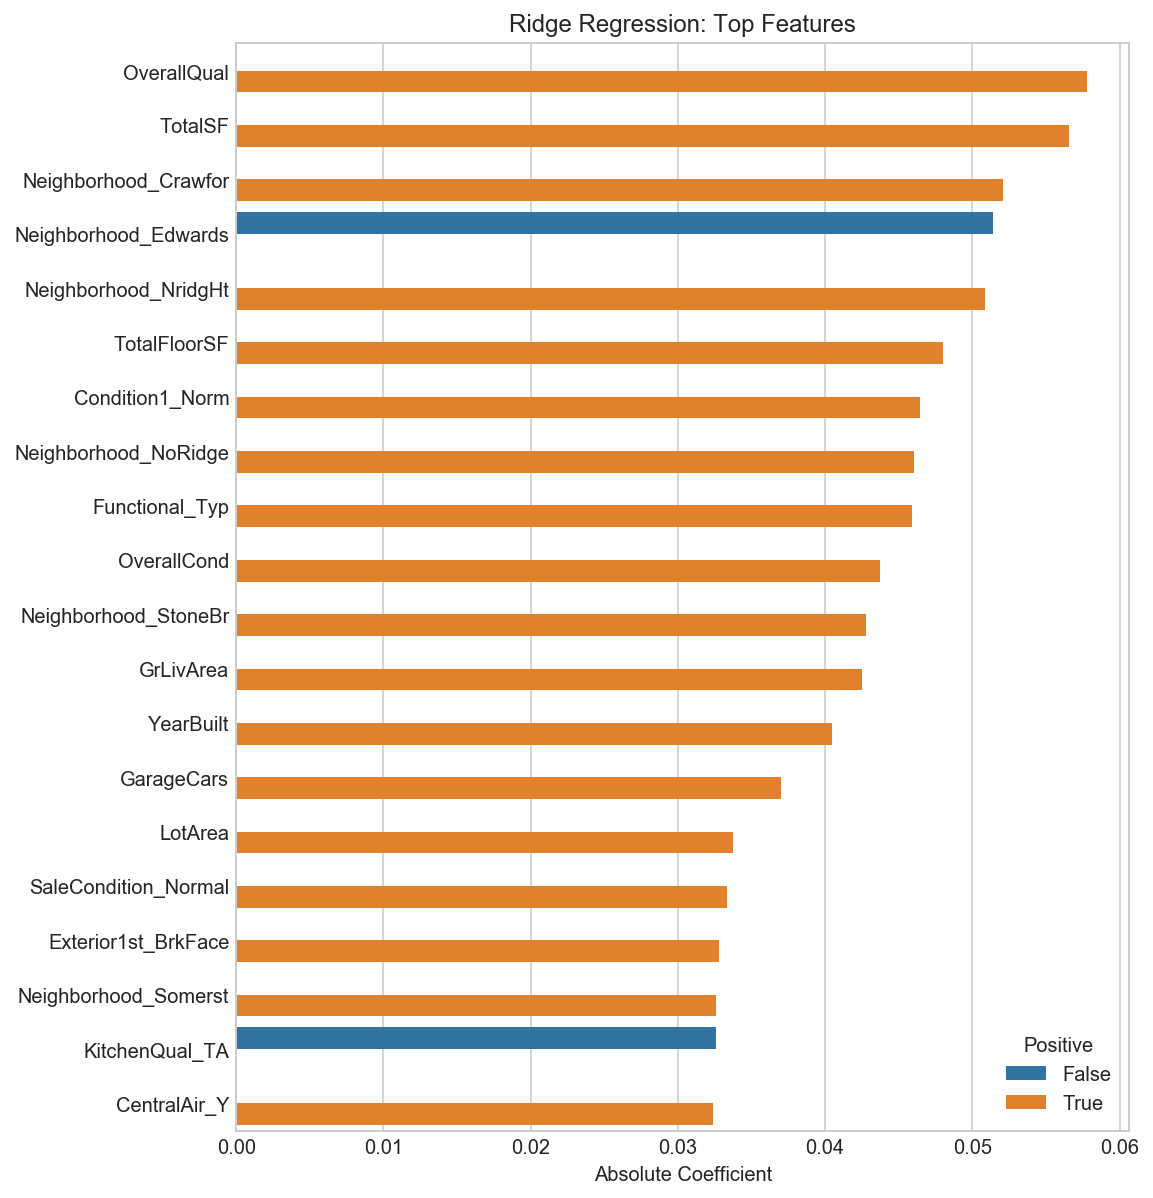

In [67]:
# Let's take a look at what the Ridge regression made of our features.
coefs = pd.DataFrame({'coefs':ridge.coef_,'Positive':ridge.coef_ > 0}, index=X_train.columns)
coefs['coefs_abs'] = np.abs(coefs.coefs)
print('Ridge dropped {} of {} features.'.format(
    sum(coefs.coefs == 0), coefs.shape[0]))

top_coefs = coefs.sort_values('coefs_abs', ascending=False).head(20)
plt.figure(figsize=(8,10))
sns.barplot( top_coefs.coefs_abs, top_coefs.index, orient='h', hue=top_coefs.Positive)
plt.title('Ridge Regression: Top Features')
plt.xlabel('Absolute Coefficient')
plt.show()

#### Qn:  Investigate how much of the variance in price remaining is explained by these features.

There is an increase in the ridge Regression $R^2$ from 0.79 to 0.86. 0.07 of the unexplained variance is attributed to the renovatable features. 

#### Qn :How would your company use this second model and its coefficients to determine whether they should buy a property or not? Explain how the company can use the two models you have built to determine if they can make money.


Seems like there is a shuffling at the top for the features with the most statistical significant coefs. TotalSF and OverallQual is now the top predictor, which makes sense for a model taking into account both fixed and renovatable features. 

Comparing the 2 models , we can see the difference in strategy for a company who has negligible renovation costs and those those with normal reno costs (and has to take into account renovatable features).

Our company can focus on houses in good neighbourhoods and typ functional structure, but low OverallQual. As we can take advantage of low renovation costs to improve 'OverallQual' and earn the margin. 

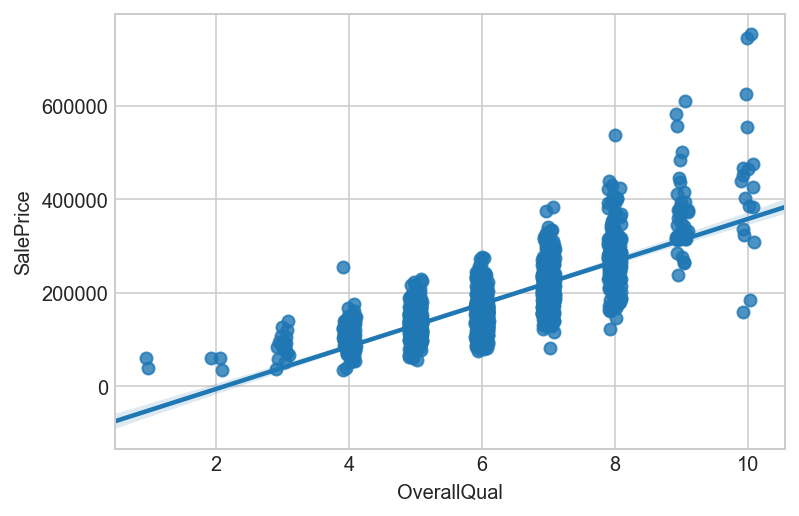

In [135]:
# Compare overall quality with sales price

sns.regplot(house['OverallQual'],house['SalePrice'],data = house,x_jitter=0.1, y_jitter=0.1)

In [152]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_predict

In [153]:
lm = LinearRegression()

In [154]:
y = house[['SalePrice']]
X = house[['OverallQual']]

In [155]:
from sklearn.model_selection import train_test_split

In [161]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=100)

In [162]:
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Qn : Evaluate the effect in dollars of the renovate-able features.

In [163]:
print('if overall Quality of the house increase by 1 , SalesPrice increases by {:.2f}'.format(lm.coef_[0][0]))# if we increase 'OverallQual' by 1 , the margin is $45,435.80

if overall Quality of the house increase by 1 , SalesPrice increases by 44780.75


### QN: Do you trust your model? Should it be used to evaluate which properties to buy and fix up?

In [150]:
from sklearn.metrics import mean_squared_error

In [160]:
mse = mean_squared_error(y_test,lm.predict(X_test))
np.sqrt(mse)

51746.716089680376

Simple Linear regression will be enough to understand the stepsize change of quality vs price . So we can lookout for houses with lower 'overall quality scores (however that is measured) , but in good neighborshoods (Stonebr, NRidgeht), and good 'functional' rating. 

<img src="http://imgur.com/GCAf1UX.png" style="float: left; margin: 25px 15px 0px 0px; height: 25px">

## 3. What property characteristics predict an "abnormal" sale?

---

The `SaleCondition` feature indicates the circumstances of the house sale. From the data file, we can see that the possibilities are:

       Normal	Normal Sale
       Abnorml	Abnormal Sale -  trade, foreclosure, short sale
       AdjLand	Adjoining Land Purchase
       Alloca	Allocation - two linked properties with separate deeds, typically condo with a garage unit	
       Family	Sale between family members
       Partial	Home was not completed when last assessed (associated with New Homes)
       
One of the executives at your company has an "in" with higher-ups at the major regional bank. His friends at the bank have made him a proposal: if he can reliably indicate what features, if any, predict "abnormal" sales (foreclosures, short sales, etc.), then in return the bank will give him first dibs on the pre-auction purchase of those properties (at a dirt-cheap price).

He has tasked you with determining (and adequately validating) which features of a property predict this type of sale. 

---

**Your task:**
1. Determine which features predict the `Abnorml` category in the `SaleCondition` feature.
- Justify your results.

This is a challenging task that tests your ability to perform classification analysis in the face of severe class imbalance. You may find that simply running a classifier on the full dataset to predict the category ends up useless: when there is bad class imbalance classifiers often tend to simply guess the majority class.

It is up to you to determine how you will tackle this problem. I recommend doing some research to find out how others have dealt with the problem in the past. Make sure to justify your solution. Don't worry about it being "the best" solution, but be rigorous.

Be sure to indicate which features are predictive (if any) and whether they are positive or negative predictors of abnormal sales.

In [68]:
# A:
